In [1]:
library(Seurat)
library(Matrix)
library(useful)
library(harmony)
library(dplyr)
library(sva)
library(RColorBrewer)
library(Scillus)
library(ggrepel)
library(stringr)
library(ggpubr)
library(reshape2)
library(fgsea)
library(yarrr)
library(viridis)

set.seed(1234)

Attaching SeuratObject

Attaching sp

Loading required package: ggplot2

Loading required package: Rcpp


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: mgcv

Loading required package: nlme


Attaching package: 'nlme'


The following object is masked from 'package:dplyr':

    collapse


This is mgcv 1.8-36. For overview type 'help("mgcv-package")'.

Loading required package: genefilter

Loading required package: BiocParallel

Loading required package: jpeg

Loading required package: BayesFactor

Loading required package: coda

************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Loading required package: circlize

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=cir

### 1. UMAP of normal kidney (non-immune) cells before removal of ambient RNA-high clusters

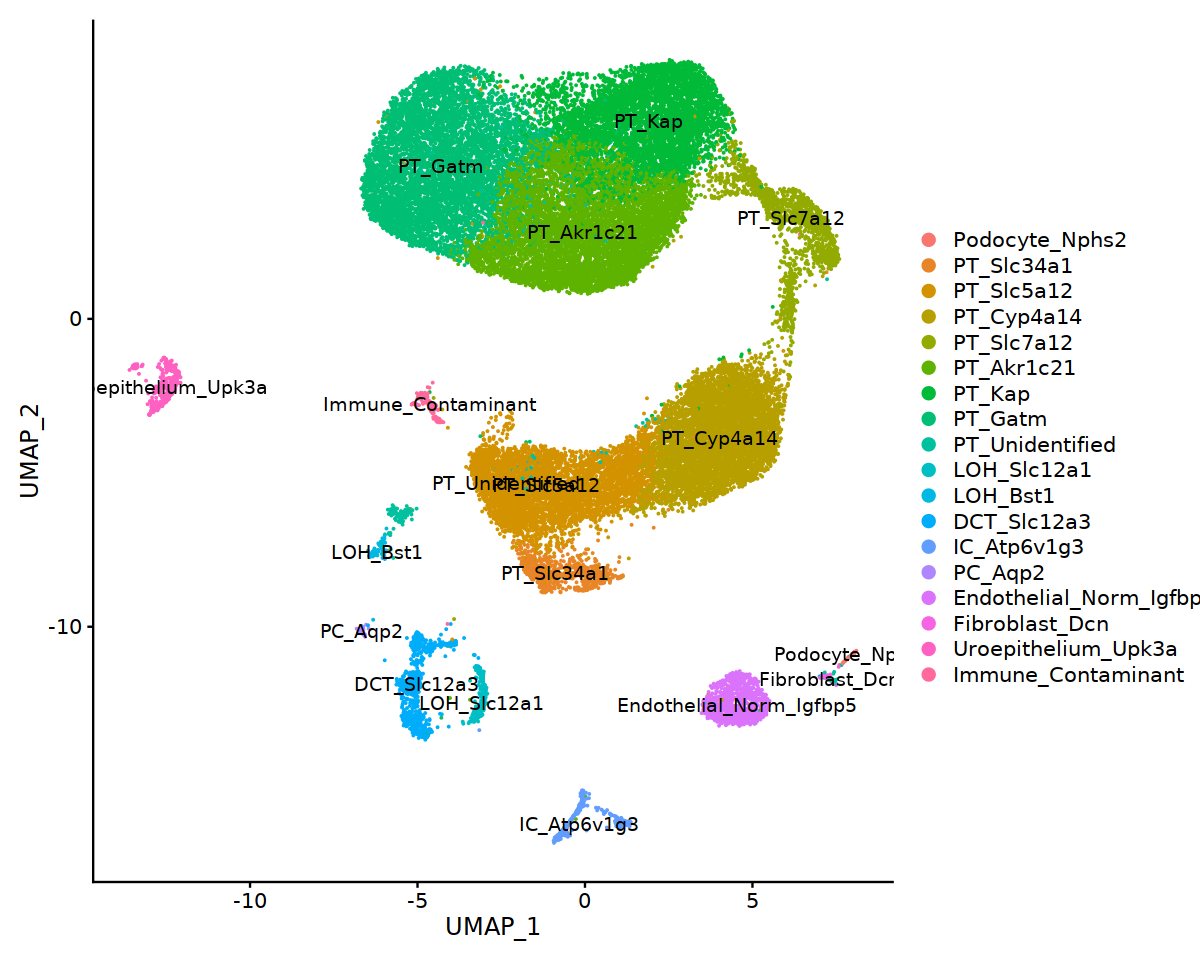

In [2]:
seur_ni_n = readRDS("Manuscript_Objects/NonImmune_NormalKidney_SeuratObject.RDS")
options(repr.plot.width=10, repr.plot.height=8)
DimPlot(seur_ni_n, label = T)

In [3]:
seur_ni_n$Sample = factor(seur_ni_n$Sample)

In [4]:
seur_ni_n$suppfig_group = Idents(seur_ni_n)

11_VX5256_T    3_BB453_T 6_BB452_KL_T    9_VX516_T   10_VX516_N  12_VX5256_N 
   "#66C2A5"    "#FC8D62"    "#8DA0CB"    "#E78AC3"    "#A6D854"    "#FFD92F" 
5_BB452_KR_N    8_BB455_N 
   "#E5C494"    "#B3B3B3"

Podocyte_Nphs2              PT_Slc34a1              PT_Slc5a12 
              "#666666"               "#8A6145"               "#AF5C24" 
             PT_Cyp4a14              PT_Slc7a12              PT_Akr1c21 
              "#CA462F"               "#DE215A"               "#E50881" 
                 PT_Kap                 PT_Gatm         PT_Unidentified 
              "#993396"               "#4D5FAA"               "#7297A9" 
            LOH_Slc12a1                LOH_Bst1             DCT_Slc12a3 
              "#C4D39F"               "#FEF796"               "#FDDD8E" 
            IC_Atp6v1g3                 PC_Aqp2 Endothelial_Norm_Igfbp5 
              "#FDC387"               "#E6B9A1"               "#CCB2C1" 
         Fibroblast_Dcn     Uroepithelium_Upk3a      Immune_Contaminant 
              "#B2B2C5"               "#98BDA2"               "#7FC97F"

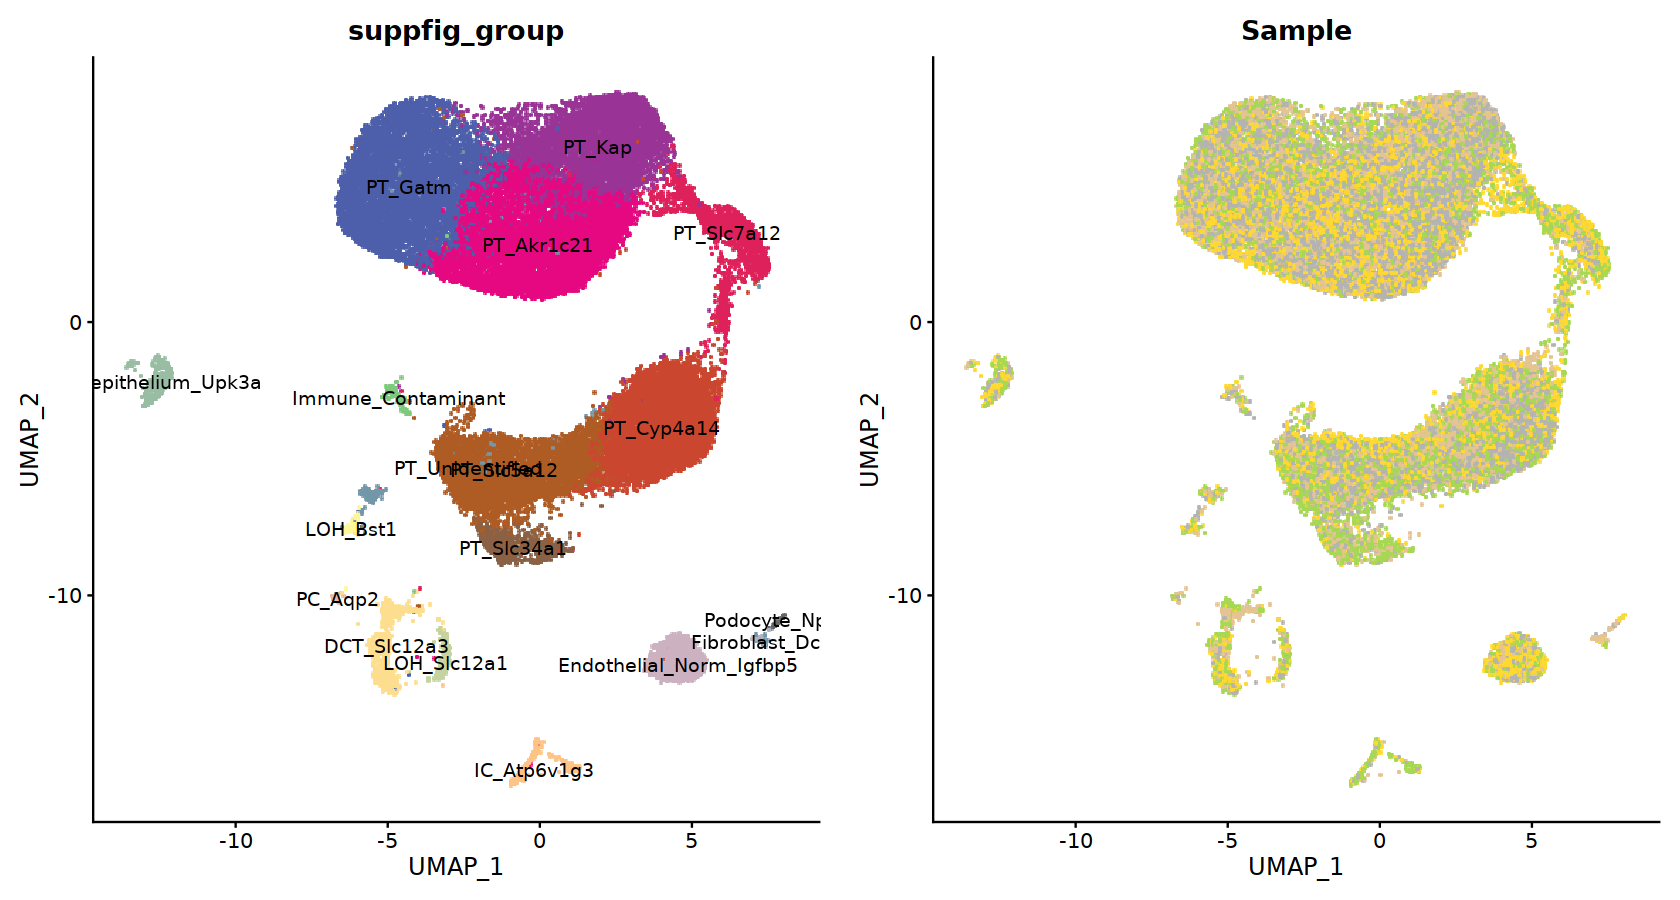

In [5]:
samp_cols = readRDS("Manuscript_Objects/Sample_Colors.RDS")
samp_cols

mycols = rev(colorRampPalette(brewer.pal(8, "Accent"))(18))
names(mycols) = as.character(levels(Idents(seur_ni_n)))
mycols

one = DimPlot(seur_ni_n, label = T, group.by = "suppfig_group",raster = T, cols = mycols[as.character(levels(seur_ni_n$suppfig_group))]) + NoLegend()
two = DimPlot(seur_ni_n, group.by = "Sample", raster = T , cols = samp_cols[levels(seur_ni_n$Sample)],shuffle = T) + NoLegend()


library(ggpubr)
options(repr.plot.width=14, repr.plot.height=7.5)
ggarrange(one, two, nrow = 1)

ggsave("Manuscript_Figures/SuppFig15_Normal_UMAPs_Combined_CellType_Sample_Repo.pdf", width = 14, height = 7.5)

11_VX5256_T    3_BB453_T 6_BB452_KL_T    9_VX516_T   10_VX516_N  12_VX5256_N 
   "#66C2A5"    "#FC8D62"    "#8DA0CB"    "#E78AC3"    "#A6D854"    "#FFD92F" 
5_BB452_KR_N    8_BB455_N 
   "#E5C494"    "#B3B3B3"

Podocyte_Nphs2              PT_Slc34a1              PT_Slc5a12 
              "#666666"               "#8A6145"               "#AF5C24" 
             PT_Cyp4a14              PT_Slc7a12              PT_Akr1c21 
              "#CA462F"               "#DE215A"               "#E50881" 
                 PT_Kap                 PT_Gatm         PT_Unidentified 
              "#993396"               "#4D5FAA"               "#7297A9" 
            LOH_Slc12a1                LOH_Bst1             DCT_Slc12a3 
              "#C4D39F"               "#FEF796"               "#FDDD8E" 
            IC_Atp6v1g3                 PC_Aqp2 Endothelial_Norm_Igfbp5 
              "#FDC387"               "#E6B9A1"               "#CCB2C1" 
         Fibroblast_Dcn     Uroepithelium_Upk3a      Immune_Contaminant 
              "#B2B2C5"               "#98BDA2"               "#7FC97F"

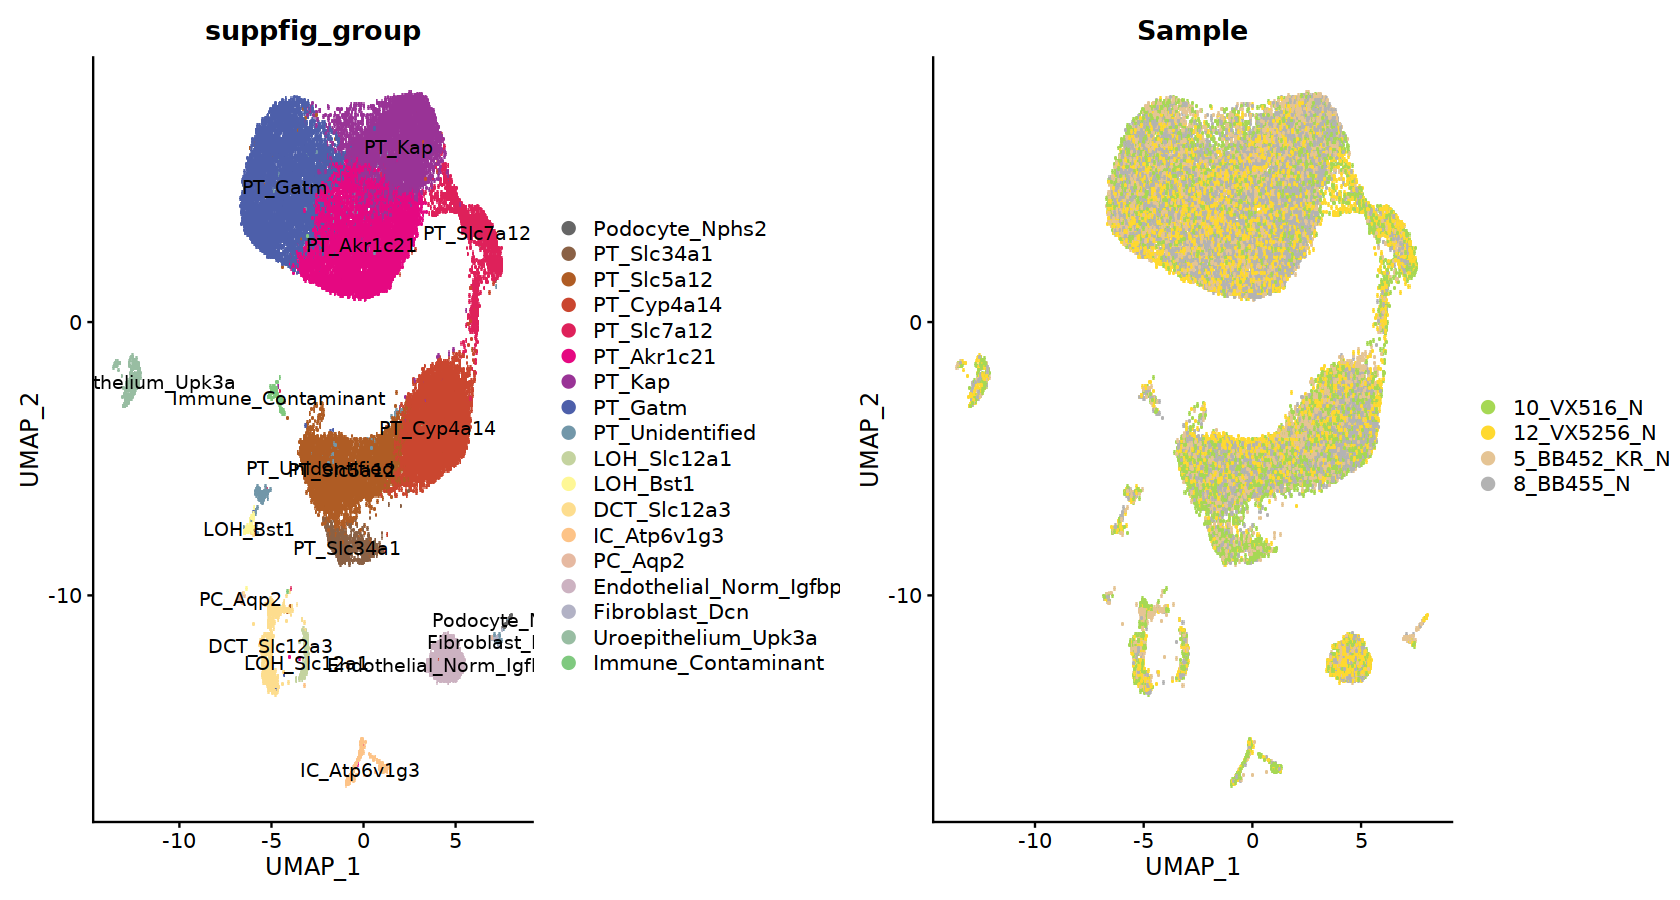

In [6]:
samp_cols = readRDS("Manuscript_Objects/Sample_Colors.RDS")
samp_cols

mycols = rev(colorRampPalette(brewer.pal(8, "Accent"))(18))
names(mycols) = as.character(levels(Idents(seur_ni_n)))
mycols

one = DimPlot(seur_ni_n, label = T, group.by = "suppfig_group",raster = T, cols = mycols[as.character(levels(seur_ni_n$suppfig_group))]) 
two = DimPlot(seur_ni_n, group.by = "Sample", raster = T , cols = samp_cols[levels(seur_ni_n$Sample)],shuffle = T) 


library(ggpubr)
options(repr.plot.width=14, repr.plot.height=7.5)
ggarrange(one, two, nrow = 1)

ggsave("Manuscript_Figures/SuppFig15_Normal_UMAPs_Combined_CellType_Sample_WithLegend_Repo.pdf", width = 14, height = 7.5)

In [7]:
seur_ni_n

An object of class Seurat 
23871 features across 35696 samples within 1 assay 
Active assay: RNA (23871 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, harmony

In [8]:
table(seur_ni_n$Sample)


  10_VX516_N  12_VX5256_N 5_BB452_KR_N    8_BB455_N 
        8052         9100         7359        11185 

### 2. Heatmaps in UMAP space of expression of PT markers

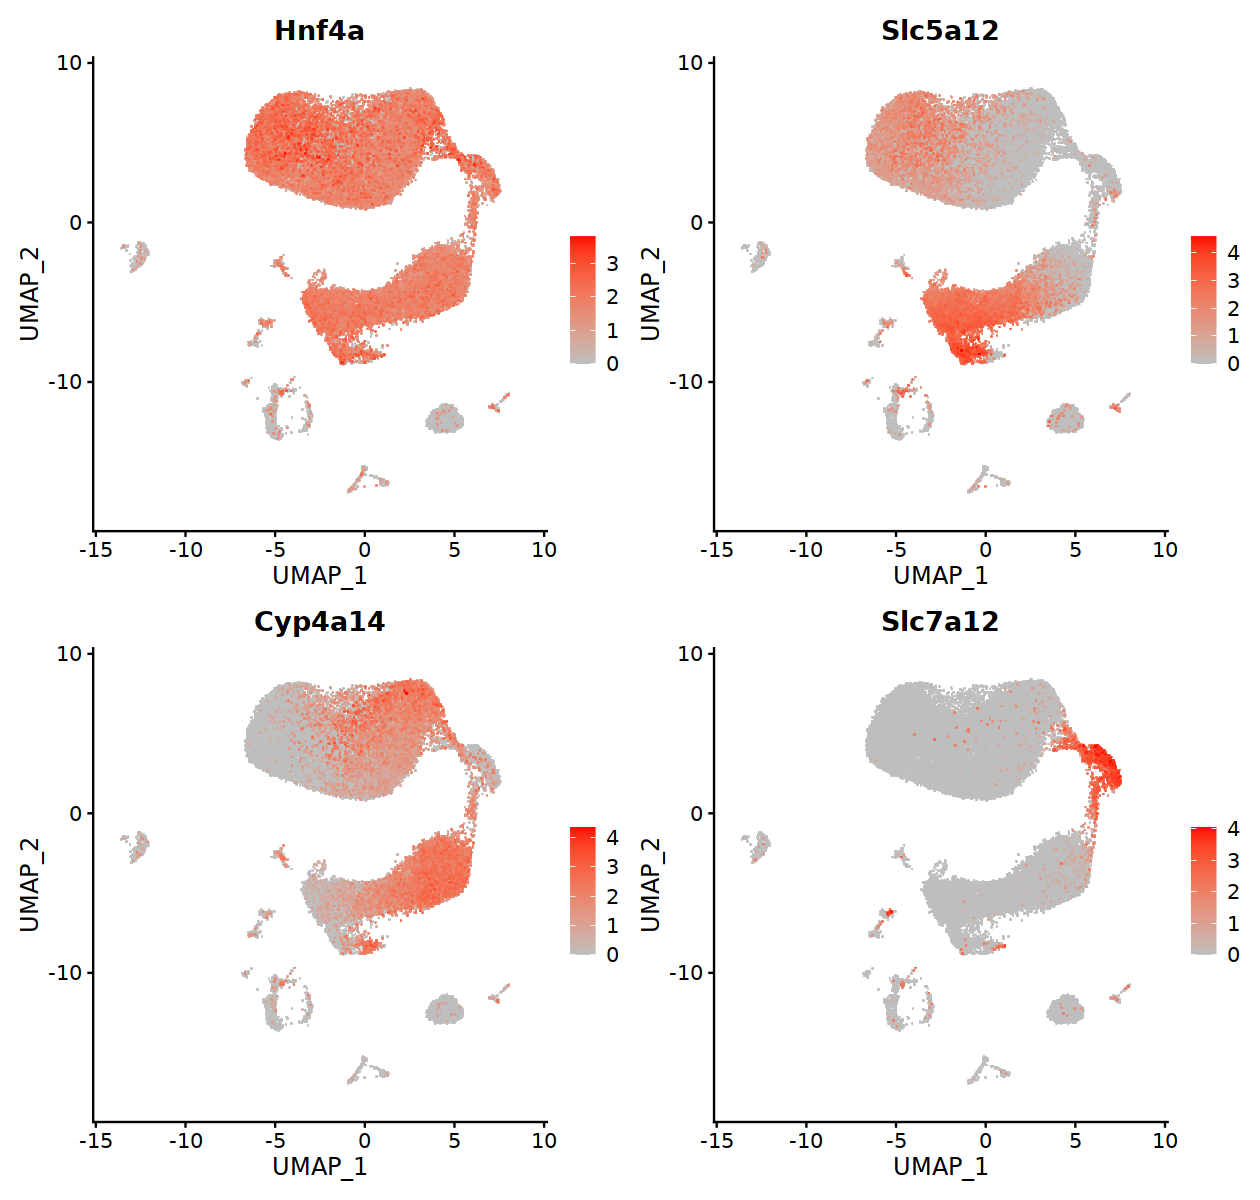

In [9]:
options(repr.plot.width=10.5, repr.plot.height=10)
FeaturePlot(seur_ni_n, c("Hnf4a","Slc5a12","Cyp4a14","Slc7a12"),order = T,ncol = 2,raster = T,cols = c("grey","red"))
ggsave("Manuscript_Figures/SuppFig15_Normal_S1S2S3_FeaturePlots_Repo.pdf", width = 10.5, height = 10)

### 3. Violin plots of QC metrics between PT_A and PT_B cells

In [10]:
seur_ni_n_sub = subset(seur_ni_n, idents = c("PT_Gatm","PT_Akr1c21", "PT_Kap", "PT_Slc34a1", "PT_Slc5a12", "PT_Cyp4a14"))
Idents(seur_ni_n_sub) = factor(Idents(seur_ni_n_sub),levels = c("PT_Gatm","PT_Akr1c21", "PT_Kap", "PT_Slc34a1", "PT_Slc5a12", "PT_Cyp4a14"))

In [11]:
seur_ni_n_sub[["percent.rps"]] <- PercentageFeatureSet(seur_ni_n_sub, pattern = "^Rps")
seur_ni_n_sub[["percent.rpl"]] <- PercentageFeatureSet(seur_ni_n_sub, pattern = "^Rpl")

In [12]:
seur_ni_n_sub$pt = Idents(seur_ni_n_sub)
meta = seur_ni_n_sub@meta.data
meta = mutate(meta, Group = ifelse(pt %in% c("PT_Gatm","PT_Akr1c21", "PT_Kap"),"PT_A","PT_B"))
seur_ni_n_sub$Group = meta$Group
seur_ni_n_sub$Group = factor(seur_ni_n_sub$Group, levels = c("PT_A","PT_B"))

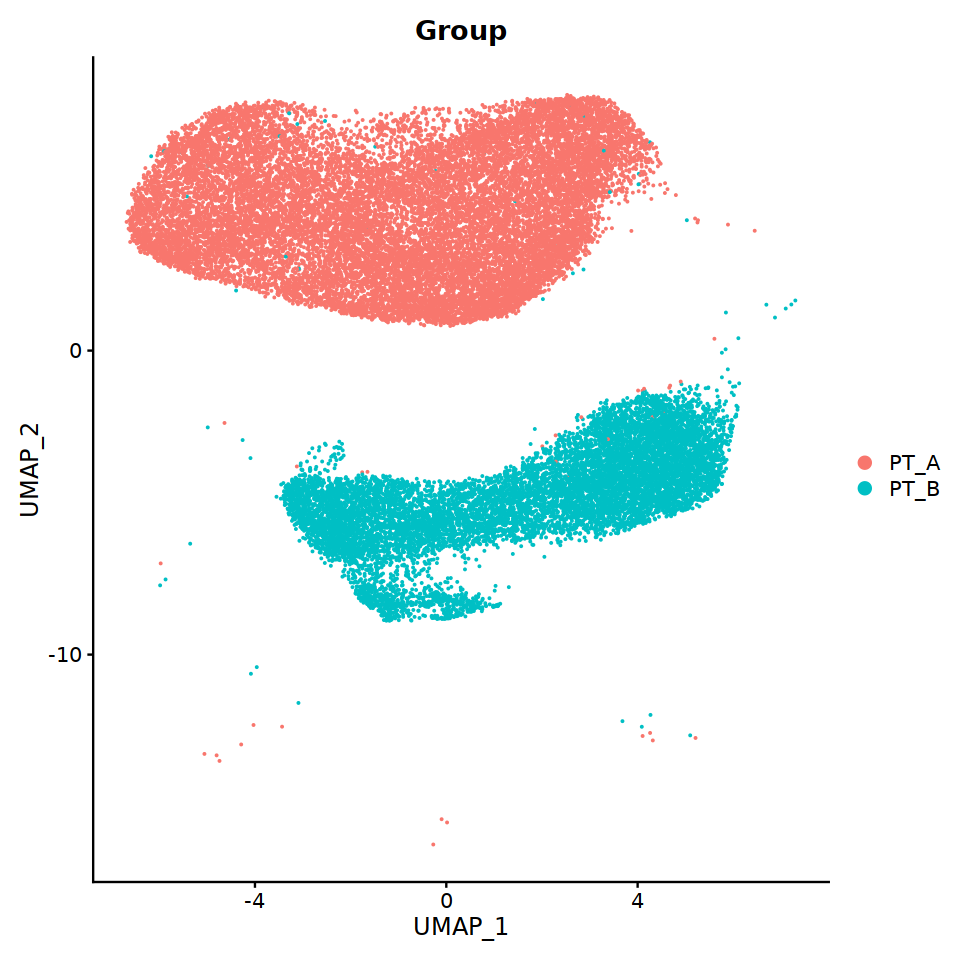

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seur_ni_n_sub, group.by = "Group")

In [14]:
library(ggrastr)

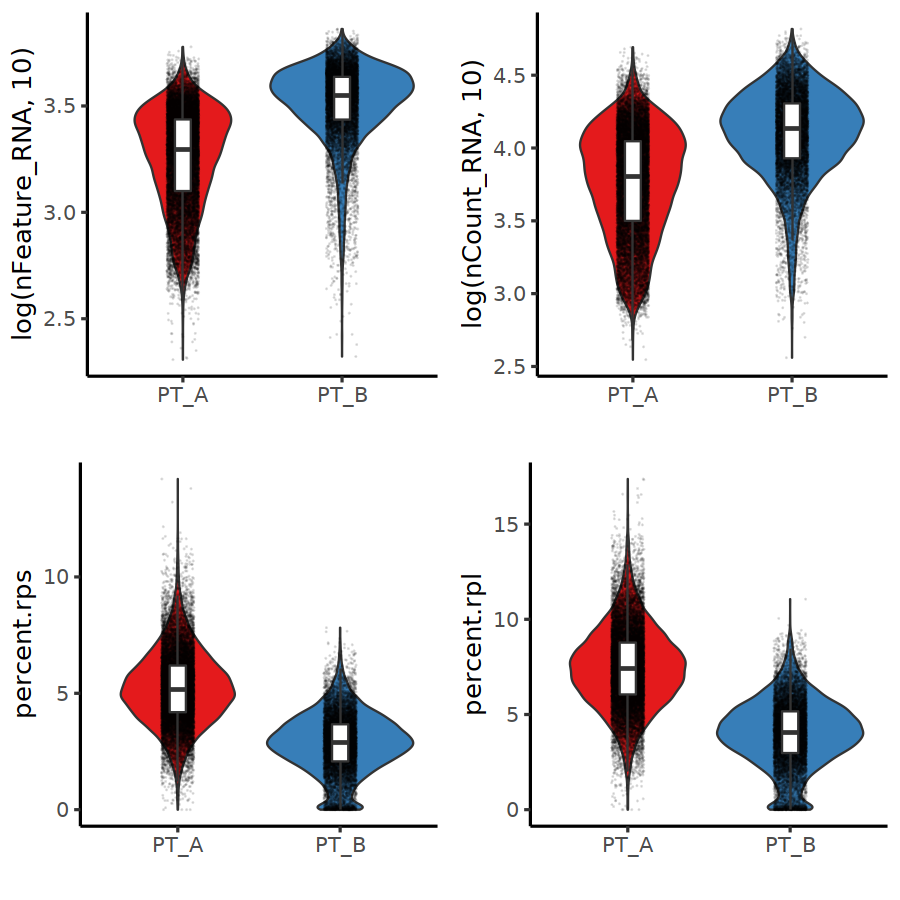

In [15]:
options(repr.plot.width=7.5, repr.plot.height=7.5)

plot_df = seur_ni_n_sub@meta.data

nfeat = ggplot(plot_df, aes(x=Group, y=log(nFeature_RNA,10), fill = Group)) + 
  geom_violin() + geom_jitter_rast(color = "black",alpha = 0.1,width = 0.1,size = 0.01) + 
geom_boxplot(width = 0.1,fill = "white",outlier.shape = NA) + theme_classic(base_size = 15) + 
scale_fill_manual(values = c("#e41a1c","#377eb8")) + theme(legend.position = "none") + xlab(label = "")

ncount = ggplot(plot_df, aes(x=Group, y=log(nCount_RNA,10), fill = Group)) + 
  geom_violin() + geom_jitter_rast(color = "black",alpha = 0.1,width = 0.1,size = 0.01) + 
geom_boxplot(width = 0.1,fill = "white",outlier.shape = NA) + theme_classic(base_size = 15) + 
scale_fill_manual(values = c("#e41a1c","#377eb8")) + theme(legend.position = "none")+ xlab(label = "")

pct.rps = ggplot(plot_df, aes(x=Group, y=percent.rps, fill = Group)) + 
  geom_violin() + geom_jitter_rast(color = "black",alpha = 0.1,width = 0.1,size = 0.01) + 
geom_boxplot(width = 0.1,fill = "white",outlier.shape = NA) + theme_classic(base_size = 15) + 
scale_fill_manual(values = c("#e41a1c","#377eb8")) + theme(legend.position = "none") + xlab(label = "")

pct.rpl = ggplot(plot_df, aes(x=Group, y=percent.rpl, fill = Group)) + 
  geom_violin() + geom_jitter_rast(color = "black",alpha = 0.1,width = 0.1,size = 0.01) + 
geom_boxplot(width = 0.1,fill = "white",outlier.shape = NA) + theme_classic(base_size = 15) + 
scale_fill_manual(values = c("#e41a1c","#377eb8")) + theme(legend.position = "none") + xlab(label = "")

ggarrange(nfeat, ncount, pct.rps, pct.rpl, nrow = 2,ncol = 2)

ggsave("Manuscript_Figures/SuppFig15_Normal_Violins_QC_Repo.pdf", width = 7.5, height = 7.5)

### 4. GSEA curve for shared top genes in low RNA droplets from normal kidney samples, PT_A vs PT_B

### Read in DE results for PT_A vs PT_B

In [16]:
pt_de = readRDS(file = "Manuscript_Objects/PT_A_vs_B_DE_LR_Sex.RDS")

In [17]:
samples = c("10_VX516_N","12_VX5256_N","5_BB452_KR_N","8_BB455_N")

In [18]:
ambient_genes = list()

for (i in 1:length(samples)){
    raw = Read10X_h5(paste("Raw_BC_Matrix//",samples[i],"_raw_feature_bc_matrix.h5",sep = ""))
    raw_colsums = colSums(raw)
                     
empties = names(which(raw_colsums > 50 & raw_colsums < 200))
empties_matrix = raw[,empties]
empties_rowsums = rowSums(empties_matrix)
empties_rowsums = empties_rowsums[order(empties_rowsums, decreasing = T)]
empties_rowsums = data.frame(empties_rowsums)
empties_rowsums$gene = row.names(empties_rowsums) 
                     
ambient_genes[[i]] = empties_rowsums[1:200,]$gene
}

names(ambient_genes) = samples

In [19]:
int_ambient = Reduce(intersect, list(ambient_genes[[1]],ambient_genes[[2]],ambient_genes[[3]],ambient_genes[[4]]))
length(int_ambient)
int_ambient

union_ambient = unique(unlist(ambient_genes))
length(union_ambient)
union_ambient

ambient_genes$int_ambient = int_ambient
ambient_genes$union_ambient = union_ambient

str(ambient_genes)

[1] 175

[1] "Gm42418"  "mt-Co3"   "mt-Atp6"  "Malat1"   "mt-Co2"   "mt-Co1"  
  [7] "mt-Cytb"  "Gpx3"     "mt-Nd2"   "Fth1"     "mt-Nd4"   "Ftl1"    
 [13] "mt-Nd1"   "Fxyd2"    "AY036118" "mt-Nd3"   "Tpt1"     "Aldob"   
 [19] "Dbi"      "Rps29"    "Cox4i1"   "Spink1"   "Gpx1"     "Rida"    
 [25] "Miox"     "Cox6c"    "Eef1a1"   "Rpl41"    "Lrp2"     "Cox7c"   
 [31] "Rplp1"    "Spp1"     "Chchd2"   "Rpl23"    "Rpl37a"   "Fau"     
 [37] "Rps24"    "Cox8a"    "Slc34a1"  "Ndufa4"   "Rps8"     "Rpl13"   
 [43] "Prdx5"    "Rpl38"    "Rpl35a"   "Hspa8"    "Rps21"    "Atp5e"   
 [49] "Rpl28"    "Rpl37"    "Rps28"    "Chchd10"  "Rpl32"    "Rps27a"  
 [55] "Rpl26"    "Ass1"     "Rpl27a"   "Rps12"    "Atp5l"    "Ppia"    
 [61] "Rps20"    "Rpl6"     "Rpl19"    "Rps10"    "Atp5b"    "Rps23"   
 [67] "Rpl39"    "Cox7b"    "Atp1a1"   "Rps19"    "Nme2"     "Rps3a1"  
 [73] "Gsta2"    "Cox7a2"   "Akr1a1"   "Rps14"    "Cox6b1"   "Cltrn"   
 [79] "Prdx1"    "Rps27"    "Atp1b1"   "Rpl11"    "Rps16"    "mt-Nd5"  
 [85] "Rplp0"    "Atp5h"    "Rpl30"    "Gatm"     "Rpl21"    "Pck1"    
 [91] "Rpl34"    "Rpl36"    "Rpl24"    "Atp5g1"   "Rps2"     "Hsp90ab1"
 [97] "Rpsa"     "Slc27a2"  "Uqcr11"   "Ndrg1"    "Ldhb"     "Rpl18a"  
[103] "Gpx4"     "Uqcr10"   "Itm2b"    "Rps15a"   "Uqcrh"    "Rps18"   
[109] "Cd63"     "Rps13"    "Cox5b"    "Lars2"    "Uqcrb"    "Rplp2"   
[115] "Atp5md"   "Atpif1"   "Atp5j"    "Rps4x"    "Ubb"      "Rps11"   
[121] "Rpl17"    "Rps9"     "Rps26"    "Scp2"     "Atp5j2"   "Rps7"    
[127] "Mdh1"     "Chpt1"    "Atp5a1"   "Slc25a3"  "Rpl9"     "Rpl8"    
[133] "Uqcrq"    "Cox5a"    "Rpl13a"   "Gapdh"    "Slc25a5"  "Akr1c21" 
[139] "Rps25"    "Cyb5a"    "Atp5k"    "Etfb"     "Hint1"    "Rpl27"   
[145] "Ndufa13"  "Ttc36"    "Mpc2"     "Rpl15"    "Rpl7"     "Rps17"   
[151] "Rpl14"    "Rps5"     "Atp5o"    "Mif"      "Eif1"     "Rps15"   
[157] "Ndufb9"   "Rpl10"    "Serf2"    "Rps3"     "Atp5mpl"  "Atp5f1"  
[163] "Rpl5"     "Atp5d"    "Fbp1"     "Ndufa2"   "Myl6"     "Ndufa6"  
[169] "Rpl22"    "Rpl12"    "Atp5c1"   "Hspe1"    "Mpc1"     "Ndufb4"  
[175] "Txn1"

[1] 227

[1] "Gm42418"   "mt-Co3"    "mt-Atp6"   "Malat1"    "mt-Co2"    "mt-Co1"   
  [7] "mt-Cytb"   "Gpx3"      "mt-Nd2"    "Fth1"      "mt-Nd4"    "Ftl1"     
 [13] "mt-Nd1"    "Fxyd2"     "AY036118"  "mt-Nd3"    "Tpt1"      "Aldob"    
 [19] "Dbi"       "Rps29"     "Cox4i1"    "Spink1"    "Gpx1"      "Rida"     
 [25] "Miox"      "Cox6c"     "Eef1a1"    "Rpl41"     "Lrp2"      "Cox7c"    
 [31] "Rplp1"     "Spp1"      "Chchd2"    "Rpl23"     "Rpl37a"    "Fau"      
 [37] "Rps24"     "Cox8a"     "Slc34a1"   "Ndufa4"    "Rps8"      "Rpl13"    
 [43] "Prdx5"     "Rpl38"     "Tmsb4x"    "Rpl35a"    "Hspa8"     "Rps21"    
 [49] "Atp5e"     "Rpl28"     "Rpl37"     "Rps28"     "Chchd10"   "Rpl32"    
 [55] "Rps27a"    "Rpl26"     "Ass1"      "Rpl27a"    "Rps12"     "Atp5l"    
 [61] "Ppia"      "Rps20"     "Rpl6"      "Rpl19"     "Rps10"     "Atp5b"    
 [67] "Rps23"     "Klk1"      "Rpl39"     "Cox7b"     "Atp1a1"    "Rps19"    
 [73] "Nme2"      "Rps3a1"    "Gsta2"     "Cox7a2"    "Akr1a1"    "Rps14"    
 [79] "Cox6b1"    "Cltrn"     "Prdx1"     "Rps27"     "Atp1b1"    "Rpl11"    
 [85] "Rps16"     "mt-Nd5"    "Rplp0"     "Atp5h"     "Rpl30"     "Gatm"     
 [91] "Rpl21"     "Pck1"      "Napsa"     "Rpl34"     "Rpl36"     "Rpl24"    
 [97] "Atp5g1"    "Rps2"      "Hsp90ab1"  "Rpsa"      "Slc27a2"   "Uqcr11"   
[103] "Ndrg1"     "Ldhb"      "Rpl18a"    "Gpx4"      "Uqcr10"    "Itm2b"    
[109] "Rps15a"    "Actb"      "Uqcrh"     "Rps18"     "Cd63"      "Rps13"    
[115] "Cox5b"     "Lars2"     "Uqcrb"     "Rplp2"     "Atp5md"    "Atpif1"   
[121] "Atp5j"     "Rps4x"     "Ubb"       "Rps11"     "Rpl17"     "Rps9"     
[127] "Rps26"     "Scp2"      "Atp5j2"    "Rps7"      "Mdh1"      "Chpt1"    
[133] "Atp5a1"    "Igfbp7"    "Slc25a3"   "Rpl9"      "Rpl8"      "Uqcrq"    
[139] "Cox5a"     "Rpl13a"    "Gapdh"     "Slc25a5"   "Akr1c21"   "Rps25"    
[145] "Umod"      "Cyb5a"     "Atp5k"     "Etfb"      "Hint1"     "Rpl27"    
[151] "Cox6a1"    "Ndufa13"   "Ttc36"     "Mpc2"      "Rpl15"     "Apoe"     
[157] "Rpl7"      "Rps17"     "Rpl14"     "S100g"     "Rps5"      "Timp3"    
[163] "Atp5o"     "Hbb-bs"    "Mif"       "Eif1"      "Rps15"     "Ndufb9"   
[169] "Rpl18"     "Rpl10"     "Serf2"     "Rps3"      "Atp5g3"    "Atp5mpl"  
[175] "mt-Nd4l"   "Atp5f1"    "Rpl5"      "Atp5d"     "Ndufc1"    "Fbp1"     
[181] "Ndufa2"    "Myl6"      "Ndufa6"    "Tmbim6"    "Apob"      "Rpl22"    
[187] "Slc4a4"    "Rpl10a"    "Rpl23a"    "Rpl12"     "Atp5c1"    "Rpl3"     
[193] "Slc13a1"   "Esd"       "Cyba"      "Hspe1"     "Mpc1"      "Ndufb4"   
[199] "Txn1"      "Rpl7a"     "Park7"     "Naca"      "Hist1h2bc" "Ubc"      
[205] "Sult1d1"   "Keg1"      "Cisd1"     "Hao2"      "Rack1"     "Sord"     
[211] "Ndufab1"   "Kap"       "Hba-a1"    "Hba-a2"    "Cyp4b1"    "Hbb-bt"   
[217] "Ybx1"      "Acsm2"     "AI314278"  "mt-Nd6"    "Ndufb8"    "Rpl36al"  
[223] "Selenop"   "Igkc"      "Nat8f1"    "Ggt1"      "Khk"

List of 6
 $ 10_VX516_N   : chr [1:200] "Gm42418" "mt-Co3" "mt-Atp6" "Malat1" ...
 $ 12_VX5256_N  : chr [1:200] "Gm42418" "mt-Co3" "mt-Atp6" "mt-Co2" ...
 $ 5_BB452_KR_N : chr [1:200] "Gm42418" "mt-Co3" "Kap" "mt-Atp6" ...
 $ 8_BB455_N    : chr [1:200] "Gm42418" "Kap" "mt-Co3" "mt-Atp6" ...
 $ int_ambient  : chr [1:175] "Gm42418" "mt-Co3" "mt-Atp6" "Malat1" ...
 $ union_ambient: chr [1:227] "Gm42418" "mt-Co3" "mt-Atp6" "Malat1" ...


In [20]:
library(fgsea)

pt_de_rnk = pt_de$avg_log2FC
names(pt_de_rnk) <- row.names(pt_de)
corner(pt_de_rnk)

fgseaRes <- fgsea(ambient_genes, pt_de_rnk, minSize=0, maxSize= 300, nperm=1000)
fgseaRes

Rb1cc1 4732440D04Rik         Cspp1         Ncoa2         Tram1 
   -0.7064510    -0.6494665    -1.0756547    -0.2863275    -0.3067863

Warning message in fgsea(ambient_genes, pt_de_rnk, minSize = 0, maxSize = 300, nperm = 1000):
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (0.5% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
10_VX516_N,0.003597122,0.003846154,0.7621880,1.974577,0,200,"Cyb5a , Prdx1 , Ftl1 , Fxyd2 , Etfb , Rps26 , Ttc36 , Tpt1 , Nme2 , Akr1c21 , Dbi , Rida , Fth1 , Atp5h , Akr1a1 , Rpl21 , Ppia , Atp5e , Mif , Gsta2 , Mpc1 , Rps4x , Rpl41 , Rps3a1 , Chchd2 , Esd , Rpl3 , Txn1 , Prdx5 , Rpl32 , Atp5mpl , Rps2 , Atp5j , Rps27a , Fau , Atp5d , Rpl6 , Scp2 , Rpl26 , Rpl34 , Rps24 , Ubb , Atp5o , Gapdh , Rps8 , Rps12 , Rpl13 , Rps9 , Rps7 , Rps11 , Rpl10 , Rpl27 , Rplp0 , Gpx1 , Rpl22 , Rpsa , Rpl23 , Rpl15 , Rpl19 , Myl6 , Uqcrb , Rpl11 , Hspe1 , Rps13 , Rpl10a , Rpl7 , Rpl18a , Ldhb , Eif1 , Rpl28 , Rpl35a , Rpl9 , Rps10 , Rpl24 , Ndufa6 , Atp5l , Rpl30 , Rps15a , Chchd10 , Rps23 , Rps5 , Atp5c1 , Rps20 , Rpl27a , Ndufc1 , Rpl17 , Rpl8 , Rpl14 , Rps14 , Slc25a5 , Gpx4 , Uqcrh , Rps18 , Atp5md , Rplp1 , Atp5f1 , Ndufa4 , Serf2 , Rpl5 , Rpl12 , Rpl37 , Cox5a , Hint1 , Aldob , Atp5g1 , Rps16 , Ndufa2 , Mdh1 , Rpl7a , Rps25 , Uqcr10 , Rps19 , Uqcrq , Rpl39 , Rpl13a , Rpl36 , Atpif1 , Rpl38 , Atp5k , Mpc2 , Rpl18 , Cox7b , AY036118, Eef1a1 , Rps29 , Ndufb4 , Rpl37a , Rplp2 , Atp5j2 , Rps17 , Rps27 , Rps3 , Miox , Cox5b , Fbp1 , Ndufa13 , Rps15 , Ass1 , Rps21 , Cox6b1 , Cox6c , Actb , Cox7a2 , Slc25a3 , Rps28 , Cox8a , Atp5b , Rpl23a , Cox4i1 , Atp5a1 , Atp5g3 , Uqcr11 , Cox7c"
12_VX5256_N,0.003597122,0.003846154,0.8065224,2.089433,0,200,"Cyb5a , Prdx1 , Ftl1 , Fxyd2 , Hist1h2bc, Etfb , Rps26 , Ttc36 , Tpt1 , Nme2 , Akr1c21 , Dbi , Rida , Fth1 , Naca , Atp5h , Akr1a1 , Rpl21 , Ppia , Atp5e , Mif , Gsta2 , Mpc1 , Rps4x , Rpl41 , Rps3a1 , Chchd2 , Esd , Rpl3 , Txn1 , Prdx5 , Rpl32 , Atp5mpl , Park7 , Rps2 , Atp5j , Rps27a , Fau , Atp5d , Rpl6 , Scp2 , Rpl26 , Rpl34 , Rps24 , Ubb , Atp5o , Gapdh , Rps8 , Rps12 , Rpl13 , Rps9 , Rps7 , Rps11 , Rpl10 , Rpl27 , Rplp0 , Gpx1 , Rpl22 , Rpsa , Rpl23 , Rpl15 , Rpl19 , Myl6 , Uqcrb , Rpl11 , Hspe1 , Rps13 , Rpl10a , Rpl7 , Rpl18a , Ldhb , Eif1 , Rpl28 , Rpl35a , Rpl9 , Rps10 , Rpl24 , Ndufa6 , Atp5l , Rpl30 , Rps15a , Chchd10 , Ndufab1 , Rps23 , Rps5 , Atp5c1 , Rps20 , Rpl27a , Cisd1 , Ndufc1 , Rpl17 , Rpl8 , Rpl14 , Rps14 , Slc25a5 , Gpx4 , Uqcrh , Rps18 , Atp5md , Rplp1 , Atp5f1 , Ndufa4 , Serf2 , Rpl5 , Rpl12 , Rpl37 , Cox5a , Hint1 , Aldob , Atp5g1 , Rps16 , Ndufa2 , Mdh1 , Rps25 , Uqcr10 , Rps19 , Uqcrq , Rpl39 , Rpl13a , Rpl36 , Atpif1 , Rpl38 , Atp5k , Mpc2 , Rpl18 , Cox7b , Rack1 , AY036118 , Eef1a1 , Rps29 , Ndufb4 , Rpl37a , Rplp2 , Atp5j2 , Rps17 , Rps27 , Rps3 , Miox , Cox5b , Fbp1 , Ndufa13 , Rps15 , Ass1 , Rps21 , Cox6b1 , Cox6c , Actb , Cox7a2 , Slc25a3 , Rps28 , Cox8a , Atp5b , Sord , Cox4i1 , Atp5a1 , Atp5g3 , Sult1d1 , Hao2 , Ubc , Uqcr11 , Cox7c , Hspa8 , S100g , Ndufb9 , Gm42418 , Keg1 , Hsp90ab1"
5_BB452_KR_N,0.003597122,0.003846154,0.7834309,2.029611,0,200,"Cyb5a , Prdx1 , Ftl1 , Fxyd2 , Hist1h2bc, Etfb , Rps26 , Ttc36 , Tpt1 , Nme2 , Akr1c21 , Dbi , Rida , Fth1 , Atp5h , Akr1a1 , Rpl21 , Ppia , Atp5e , Mif , Gsta2 , Mpc1 , Rps4x , Rpl41 , Rps3a1 , Chchd2 , Esd , Txn1 , Prdx5 , Rpl32 , Atp5mpl , Park7 , Rps2 , Atp5j , Rps27a , Fau , Atp5d , Rpl6 , Scp2 , Rpl26 , Rpl34 , Rps24 , Ubb , Atp5o , Gapdh , Rps8 , Rps12 , Rpl13 , Rps9 , Ybx1 , Rps7 , Rps11 , Rpl10 , Rpl27 , Rplp0 , Gpx1 , Rpl22 , Rpsa , Rpl23 , Rpl15 , Rpl19 , Myl6 , Uqcrb , Rpl11 , Hspe1 , Rps13 , Rpl7 , Rpl18a , Ldhb , Eif1 , Rpl28 , Rpl35a , Rpl9 , Rps10 , Rpl36al , Rpl24 , Ndufa6 , Atp5l , Rpl30 , Rps15a , Chchd10 , Rps23 , Rps5 , Atp5c1 , Rps20 , Rpl27a , Cisd1 , Ndufc1 , Rpl17 , Rpl8 , Rpl14 , Rps14 , Slc25a5 , Gpx4 , Uqcrh , Rps18 , Atp5md , Rplp1 , Atp5f1 , Ndufa4 , Serf2 , Rpl5 , Rpl12 , Rpl37 , Cox5a , Hint1 , Aldob , Atp5g1 , Rps16 , Ndufa2 , Mdh1 , Rps25 , Uqcr10 , Rps19 , Uqcrq , Rpl39 , Rpl13a , Rpl36 , Atpif1 , Rpl38 , Atp5k , Mpc2 , Cox7b , AY036118 , Eef1a1 , Rps29 , Ndufb4 , Rpl37a , Rplp2 , AI314278 , Atp5j2 , Rps17 , Rps27 , Rps3 , Miox , Cox5b , Fbp1 , Ndufa13 , Rps15 , Ass1 , Rps21 , Cox6b1 , Cox6c

In [21]:
plotEnrichment <- function (pathway, stats, gseaParam = 1, ticksSize = 0.1, ybreaks, ylims, curvecol) 
{
    rnk <- rank(-stats)
    ord <- order(rnk)
    statsAdj <- stats[ord]
    statsAdj <- sign(statsAdj) * (abs(statsAdj)^gseaParam)
    statsAdj <- statsAdj/max(abs(statsAdj))
    pathway <- unname(as.vector(na.omit(match(pathway, names(statsAdj)))))
    pathway <- sort(pathway)
    gseaRes <- calcGseaStat(statsAdj, selectedStats = pathway, 
        returnAllExtremes = TRUE)
    bottoms <- gseaRes$bottoms
    tops <- gseaRes$tops
    n <- length(statsAdj)
    xs <- as.vector(rbind(pathway - 1, pathway))
    ys <- as.vector(rbind(bottoms, tops))
    toPlot <- data.frame(x = c(0, xs, n + 1), y = c(0, ys, 0))
    diff <- (max(tops) - min(bottoms))/8
    x = y = NULL
    g <- ggplot(toPlot, aes(x = x, y = y)) + geom_point(color = curvecol, 
        size = 2) + geom_hline(yintercept = 0, 
        colour = "black") + geom_line(color = curvecol, size = 0.75, linetype = "dashed") + theme_bw() + 
        geom_segment(data = data.frame(x = pathway), mapping = aes(x = x, 
            y = -diff/2, xend = x, yend = diff/2), size = ticksSize, color = curvecol) + 
        theme_classic(base_size = 15) + 
        labs(x = "rank", y = "enrichment score") + scale_y_continuous(breaks=ybreaks, limits = ylims)
    g
}

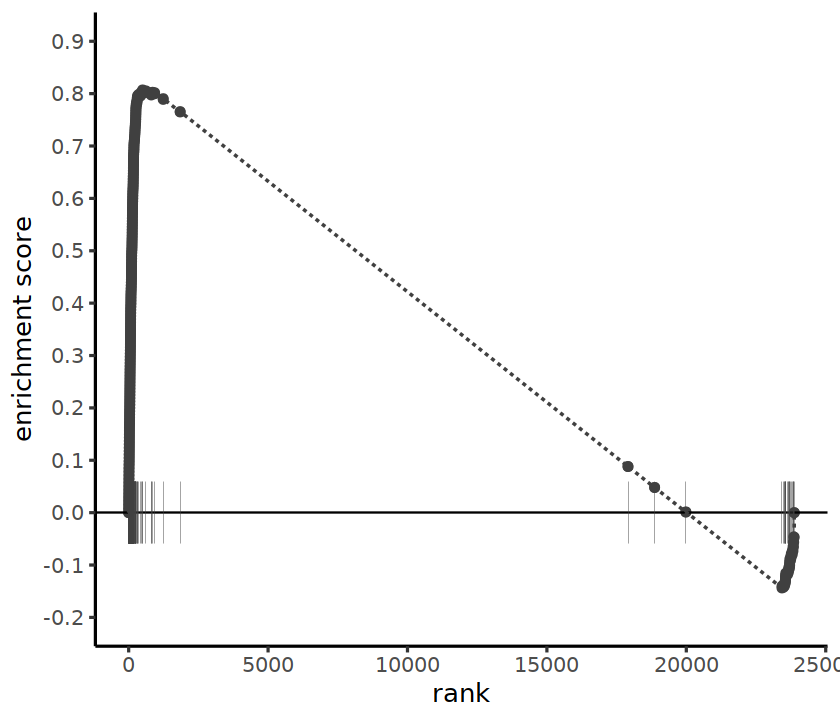

In [22]:
options(repr.plot.width=7, repr.plot.height=6)
gsea_plot_int_ambient = plotEnrichment(ambient_genes[["int_ambient"]], pt_de_rnk, ybreaks = seq(from = -0.2, to = 0.9, by = 0.1), ylims = c(-0.2,0.9), curvecol = "grey25")
gsea_plot_int_ambient

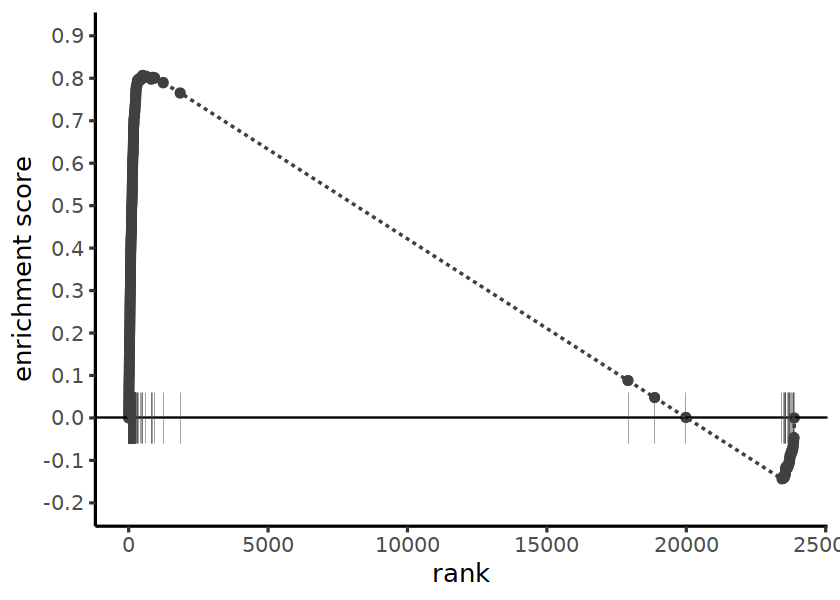

In [23]:
options(repr.plot.width=7, repr.plot.height=5)
ggarrange(gsea_plot_int_ambient, ncol = 1)
ggsave("Manuscript_Figures/SuppFig15_IntAmbient_Norm_GSEA_Curves_Repo.pdf", width = 7, height = 5)

### 5. UMAP of tumor (non-immune) cells before removal of ambient RNA-high cluster, violin plots of QC metrics

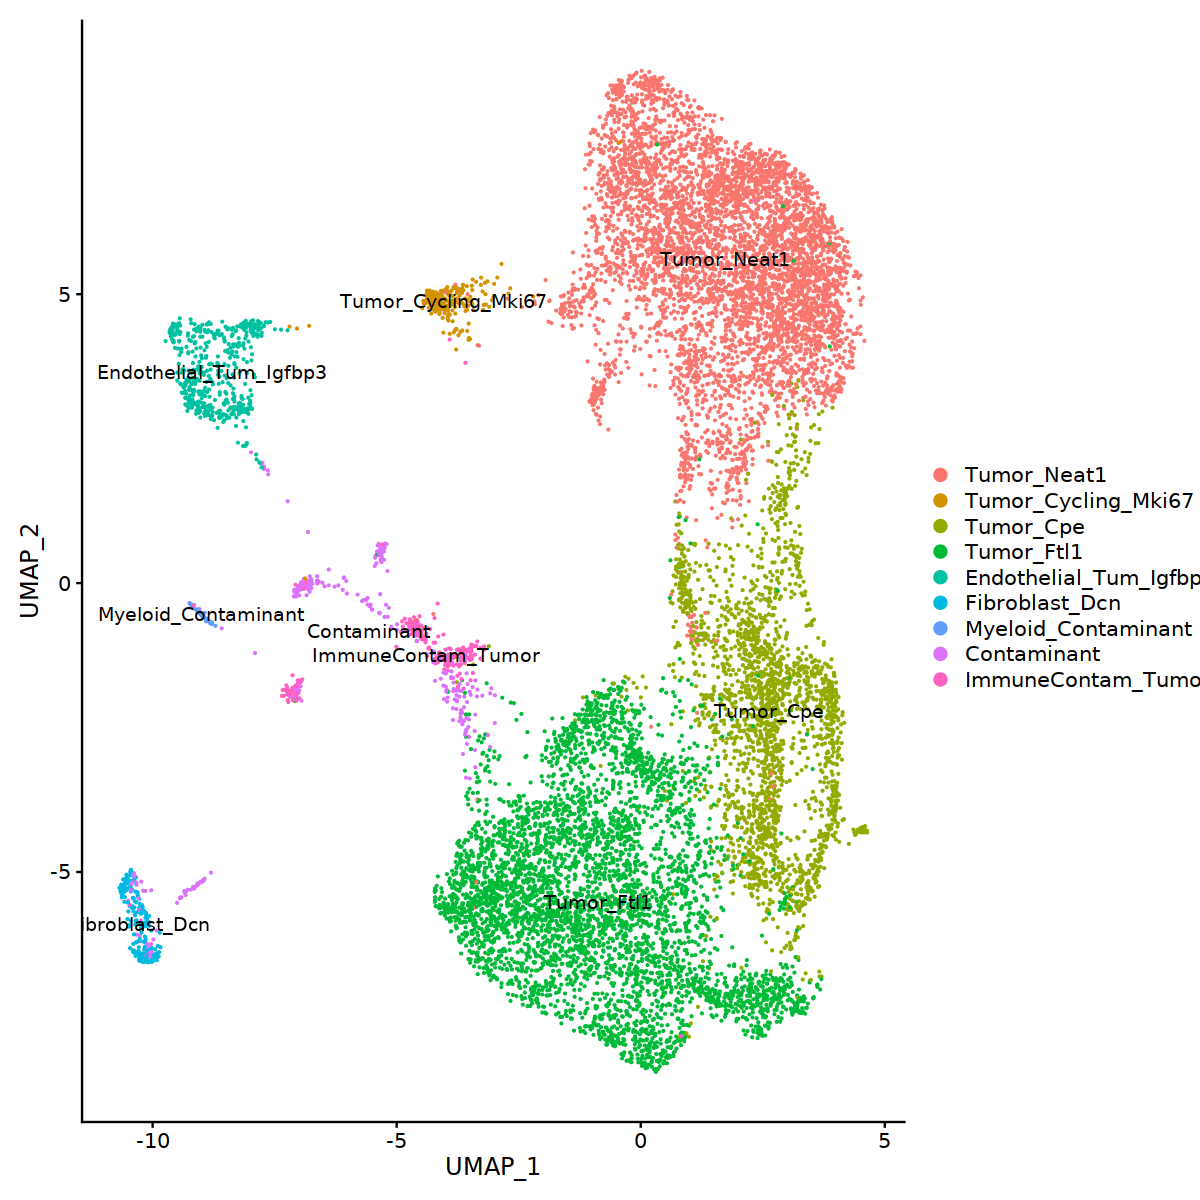

In [24]:
options(repr.plot.width=10, repr.plot.height=10)
seur_ni_t = readRDS(file = "Manuscript_Objects/NonImmune_Tumor_SeuratObject.RDS")
DimPlot(seur_ni_t,label=T)

In [25]:
seur_ni_t

An object of class Seurat 
23871 features across 13884 samples within 1 assay 
Active assay: RNA (23871 features, 3000 variable features)
 3 dimensional reductions calculated: pca, umap, harmony

Tumor_Neat1    Tumor_Cycling_Mki67              Tumor_Cpe 
             "#BC4399"              "#C16610"              "#1B9E77" 
            Tumor_Ftl1 Endothelial_Tum_Igfbp3         Fibroblast_Dcn 
             "#8D6B86"              "#A66753"              "#96A713" 
   Myeloid_Contaminant            Contaminant     ImmuneContam_Tumor 
             "#D59D08"              "#9D7426"              "#666666"

11_VX5256_T    3_BB453_T 6_BB452_KL_T    9_VX516_T   10_VX516_N  12_VX5256_N 
   "#66C2A5"    "#FC8D62"    "#8DA0CB"    "#E78AC3"    "#A6D854"    "#FFD92F" 
5_BB452_KR_N    8_BB455_N 
   "#E5C494"    "#B3B3B3"

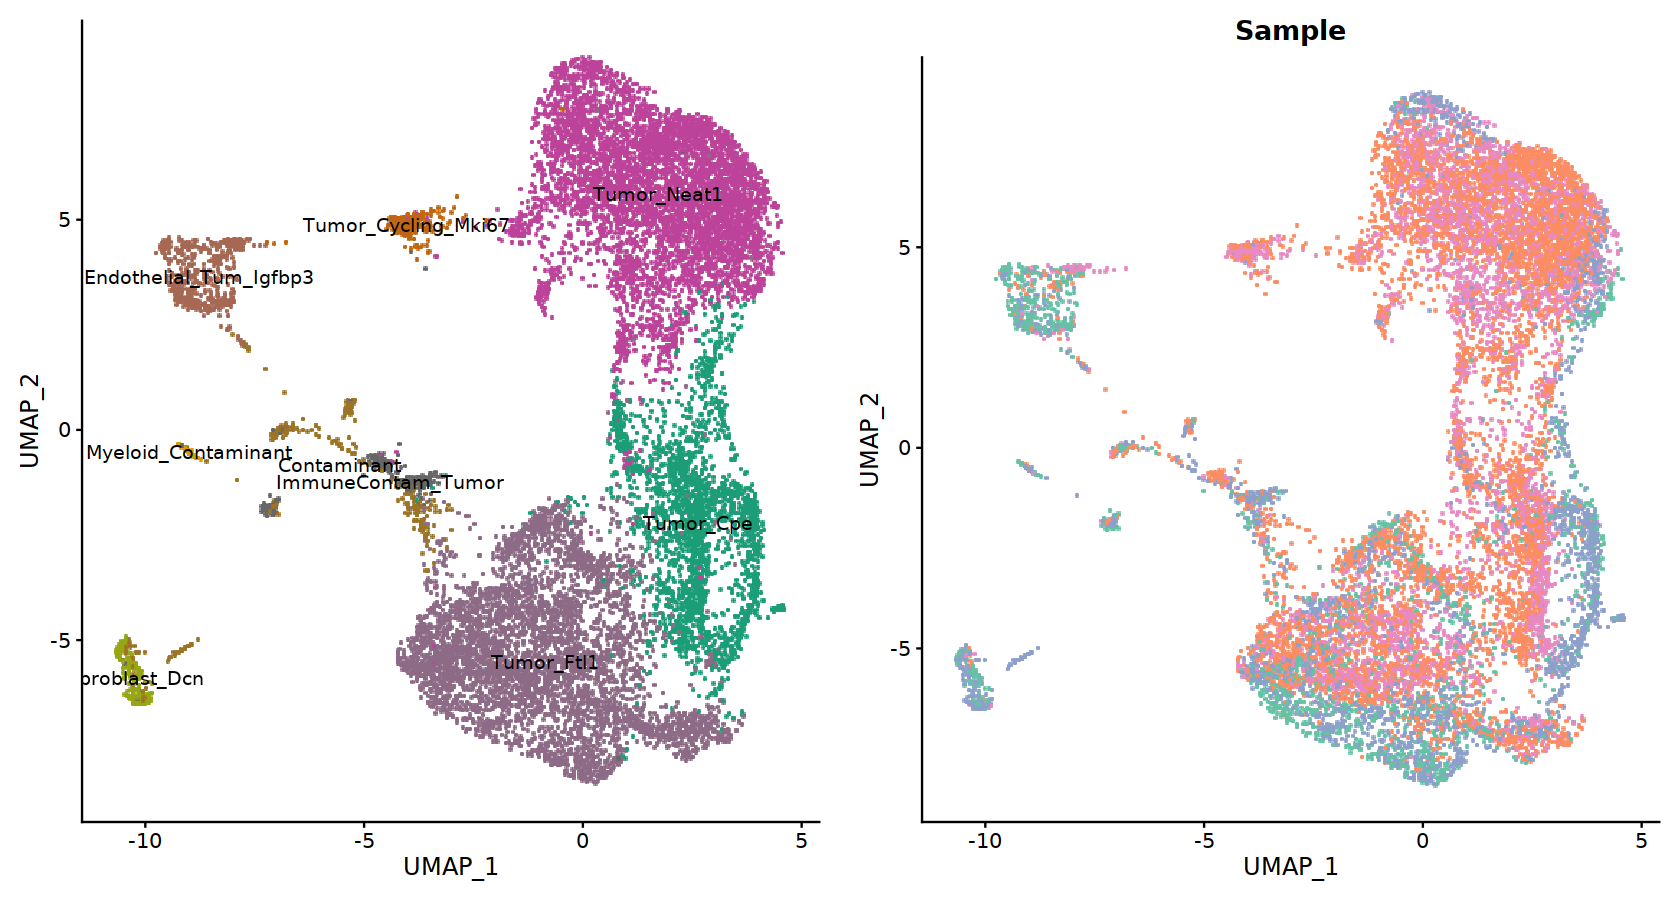

In [26]:
ordered = c("Tumor_Neat1","Tumor_Cycling_Mki67","Tumor_Cpe","Tumor_Ftl1","Endothelial_Tum_Igfbp3","Fibroblast_Dcn","Myeloid_Contaminant","Contaminant","ImmuneContam_Tumor")
Idents(seur_ni_t) = factor(Idents(seur_ni_t), levels = ordered)
seur_ni_t$suppfig_group = Idents(seur_ni_t)

seur_ni_t$Sample = factor(seur_ni_t$Sample)

mycols = colorRampPalette(brewer.pal(8, "Dark2"))(9)
names(mycols) = as.character(levels(Idents(seur_ni_t)))

mycols["Tumor_Neat1"] = "#BC4399"
mycols["Tumor_Cpe"] = "#1B9E77"
mycols["Tumor_Ftl1"] = "#8D6B86"

mycols

samp_cols = readRDS("Manuscript_Objects/Sample_Colors.RDS")
samp_cols

one = DimPlot(seur_ni_t, label = T, raster=T,cols = mycols[as.character(levels(Idents(seur_ni_t)))]) + NoLegend()
two = DimPlot(seur_ni_t, group.by = "Sample", raster =T,cols = samp_cols[levels(seur_ni_t$Sample)],shuffle = T) + NoLegend()


library(ggpubr)
options(repr.plot.width=14, repr.plot.height=7.5)
ggarrange(one, two, nrow = 1)

ggsave("Manuscript_Figures/SuppFig15_Tumor_UMAPs_Combined_CellType_Sample_Repo.pdf", width = 14, height = 7.5)

In [27]:
library(ggrastr)

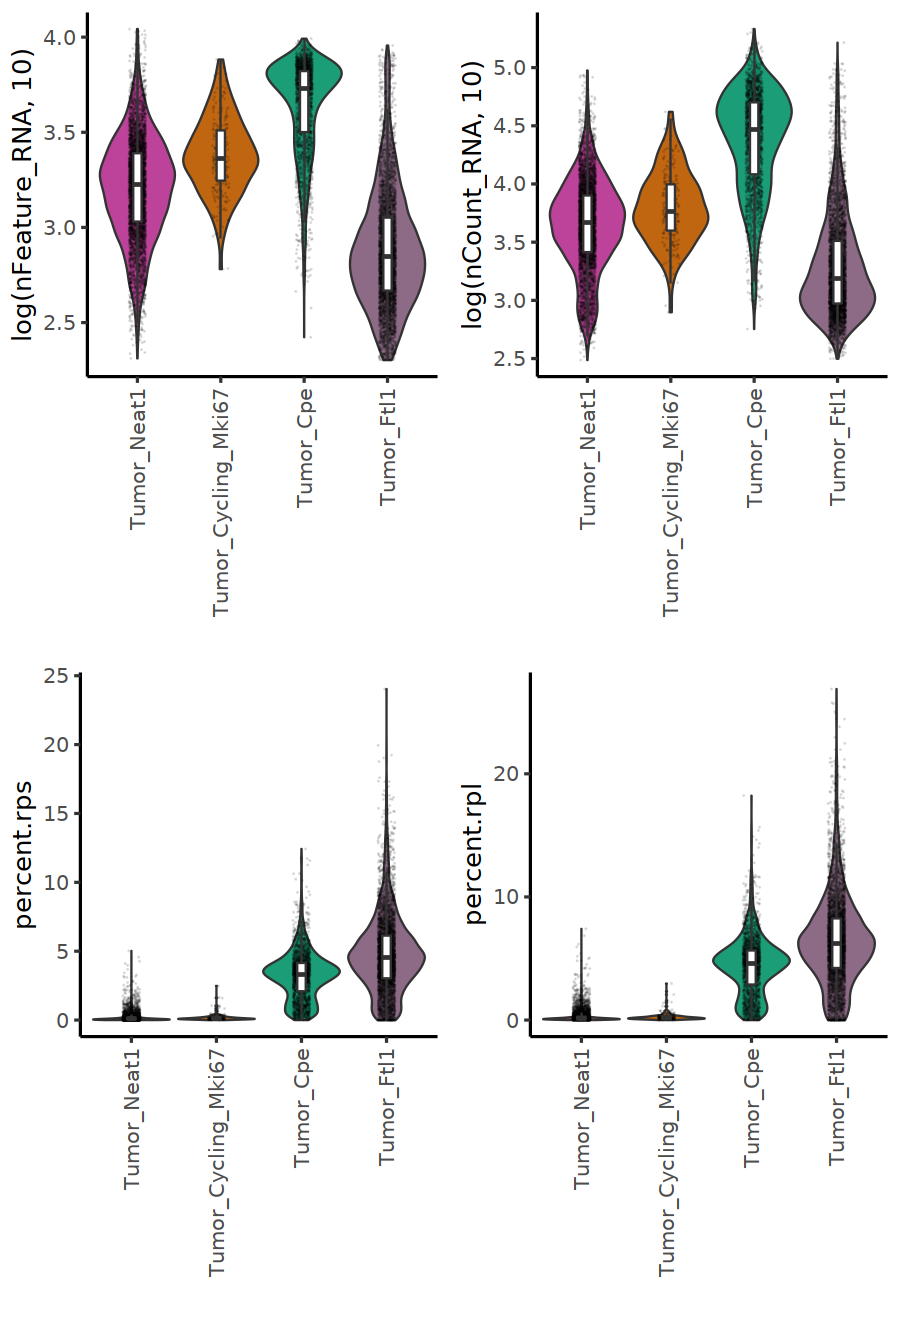

In [28]:
seur_ni_t_tum = subset(seur_ni_t,idents = c("Endothelial_Tum_Igfbp3","Fibroblast_Dcn","Myeloid_Contaminant","Contaminant","ImmuneContam_Tumor"),invert = T)

seur_ni_t_tum[["percent.rps"]] <- PercentageFeatureSet(seur_ni_t_tum, pattern = "^Rps")
seur_ni_t_tum[["percent.rpl"]] <- PercentageFeatureSet(seur_ni_t_tum, pattern = "^Rpl")

seur_ni_t_tum$Tumor_Cluster = Idents(seur_ni_t_tum)

options(repr.plot.width=7.5, repr.plot.height=11)

plot_df = seur_ni_t_tum@meta.data

nfeat = ggplot(plot_df, aes(x=Tumor_Cluster, y=log(nFeature_RNA,10), fill = Tumor_Cluster)) + 
  geom_violin(scale = "width") + geom_jitter_rast(color = "black",alpha = 0.1,width = 0.1,size = 0.01) + 
geom_boxplot(width = 0.1,fill = "white",outlier.shape = NA) + theme_classic(base_size = 15) + 
scale_fill_manual(values = mycols[levels(seur_ni_t_tum$Tumor_Cluster)]) + theme(legend.position = "none",axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + xlab(label = "")

ncount = ggplot(plot_df, aes(x=Tumor_Cluster, y=log(nCount_RNA,10), fill = Tumor_Cluster)) + 
  geom_violin(scale = "width") + geom_jitter_rast(color = "black",alpha = 0.1,width = 0.1,size = 0.01) + 
geom_boxplot(width = 0.1,fill = "white",outlier.shape = NA) + theme_classic(base_size = 15) + 
scale_fill_manual(values = mycols[levels(seur_ni_t_tum$Tumor_Cluster)]) + theme(legend.position = "none",axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+ xlab(label = "")

pct.rps = ggplot(plot_df, aes(x=Tumor_Cluster, y=percent.rps, fill = Tumor_Cluster)) + 
  geom_violin(scale = "width") + geom_jitter_rast(color = "black",alpha = 0.1,width = 0.1,size = 0.01) + 
geom_boxplot(width = 0.1,fill = "white",outlier.shape = NA) + theme_classic(base_size = 15) + 
scale_fill_manual(values = mycols[levels(seur_ni_t_tum$Tumor_Cluster)]) + theme(legend.position = "none",axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + xlab(label = "")

pct.rpl = ggplot(plot_df, aes(x=Tumor_Cluster, y=percent.rpl, fill = Tumor_Cluster)) + 
  geom_violin(scale = "width") + geom_jitter_rast(color = "black",alpha = 0.1,width = 0.1,size = 0.01) + 
geom_boxplot(width = 0.1,fill = "white",outlier.shape = NA) + theme_classic(base_size = 15) + 
scale_fill_manual(values = mycols[levels(seur_ni_t_tum$Tumor_Cluster)]) + theme(legend.position = "none",axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + xlab(label = "")

ggarrange(nfeat, ncount, pct.rps, pct.rpl, nrow = 2,ncol = 2)

ggsave("Manuscript_Figures/SuppFig15_Tumor_Violins_QC_Repo.pdf", width = 7.5, height = 11)

### 6. GSEA curves for top genes in low RNA droplets from tumor samples, Tum_Ftl1 vs Tum_Neat1, Tum_Cpe vs Tum_Neat1, Tum_Ftl1 vs Tum_Cpe

In [29]:
samples = c("11_VX5256_T","3_BB453_T","6_BB452_KL_T","9_VX516_T")

In [30]:
ambient_genes = list()

for (i in 1:length(samples)){
    raw = Read10X_h5(paste("Raw_BC_Matrix//",samples[i],"_raw_feature_bc_matrix.h5",sep = ""))
    raw_colsums = colSums(raw)
                     
empties = names(which(raw_colsums > 50 & raw_colsums < 200))
empties_matrix = raw[,empties]
empties_rowsums = rowSums(empties_matrix)
empties_rowsums = empties_rowsums[order(empties_rowsums, decreasing = T)]
empties_rowsums = data.frame(empties_rowsums)
empties_rowsums$gene = row.names(empties_rowsums) 
                     
ambient_genes[[i]] = empties_rowsums[1:200,]$gene
}

names(ambient_genes) = samples

In [31]:
int_ambient = Reduce(intersect, list(ambient_genes[[1]],ambient_genes[[2]],ambient_genes[[3]],ambient_genes[[4]]))
length(int_ambient)
int_ambient

union_ambient = unique(unlist(ambient_genes))
length(union_ambient)
union_ambient

ambient_genes$int_ambient = int_ambient
ambient_genes$union_ambient = union_ambient

str(ambient_genes)


[1] 143

[1] "Gm42418"  "Malat1"   "Tmsb4x"   "Spp1"     "Fth1"     "Apoe"    
  [7] "Ftl1"     "Tpt1"     "Rps24"    "Rplp1"    "Fau"      "Rpl13"   
 [13] "Rpl23"    "Rps29"    "AY036118" "Cryab"    "Rps15a"   "Rpl37a"  
 [19] "mt-Co3"   "Rps8"     "Actb"     "Rpl32"    "Rpl39"    "Rpl27a"  
 [25] "Rps27a"   "Rps16"    "Rps21"    "mt-Co1"   "Rpl19"    "Eef1a1"  
 [31] "Rpl41"    "Rps12"    "Rps23"    "Rpl37"    "Rpl30"    "Rps20"   
 [37] "Rps10"    "Rpl35a"   "Rps27"    "Rps13"    "Tmsb10"   "Rps7"    
 [43] "Rps18"    "Rpsa"     "Rps3a1"   "Rpl34"    "mt-Atp6"  "Rps14"   
 [49] "Rpl18a"   "Rps11"    "B2m"      "Rpl17"    "Rplp2"    "Rpl38"   
 [55] "Rps19"    "mt-Co2"   "Rpl12"    "Rps4x"    "Rps28"    "Rps9"    
 [61] "Rpl11"    "Rpl21"    "Rpl9"     "Rpl26"    "Rps5"     "Rps26"   
 [67] "Rplp0"    "Rpl6"     "Rpl28"    "Rps3"     "Rpl18"    "Ppia"    
 [73] "Rps2"     "Prdx1"    "H2-D1"    "Rpl36"    "Rpl24"    "Rpl27"   
 [79] "S100a6"   "Ctsd"     "H2-K1"    "Fxyd2"    "Gpx3"     "Ctsb"    
 [85] "Cst3"     "Rpl15"    "Ctsl"     "Dbi"      "Rps15"    "Itm2b"   
 [91] "Rps25"    "Ubb"      "Rpl10a"   "Ptma"     "Gpx1"     "Cd63"    
 [97] "Serf2"    "Cox8a"    "Cox4i1"   "Crip1"    "Cyba"     "Myl6"    
[103] "Cox7c"    "Gapdh"    "Hspa8"    "mt-Cytb"  "Hsp90ab1" "Mif"     
[109] "Rps17"    "Cox6c"    "mt-Nd1"   "Selenop"  "Lgals3"   "mt-Nd2"  
[115] "Chchd2"   "Cstb"     "mt-Nd4"   "Gpx4"     "Lgals1"   "Nme2"    
[121] "Gsta2"    "Txn1"     "Psap"     "Cox6b1"   "Tmem176a" "Atp5l"   
[127] "Gng5"     "Gstm1"    "Atox1"    "Cox5a"    "Cox7a2"   "Tmem176b"
[133] "Atp6v0c"  "Ctsz"     "Mt1"      "Esd"      "Hint1"    "Ptgds"   
[139] "Lamp1"    "Atpif1"   "Atp5j2"   "Cox5b"    "Cox6a1"

[1] 276

[1] "Hbb-bs"    "Gm42418"   "Malat1"    "Tmsb4x"    "Spp1"      "Fth1"     
  [7] "Apoe"      "Hba-a1"    "Ftl1"      "Hba-a2"    "Tpt1"      "Rps24"    
 [13] "Rplp1"     "Fau"       "Rpl13"     "Rpl23"     "Rps29"     "AY036118" 
 [19] "Hbb-bt"    "Cryab"     "Lyz2"      "Rps15a"    "Rpl37a"    "mt-Co3"   
 [25] "Rps8"      "Actb"      "Rpl32"     "Rpl39"     "Rpl27a"    "Rps27a"   
 [31] "Rps16"     "Rps21"     "mt-Co1"    "Rpl19"     "Eef1a1"    "Rpl41"    
 [37] "Rps12"     "Rps23"     "Rpl37"     "Rpl30"     "Rps20"     "Ccl5"     
 [43] "Rps10"     "Rpl35a"    "Rps27"     "Rps13"     "Tmsb10"    "Rps7"     
 [49] "Rps18"     "Rpsa"      "Rps3a1"    "Rpl34"     "mt-Atp6"   "Cd74"     
 [55] "Rps14"     "Rpl18a"    "Rps11"     "B2m"       "Rpl17"     "Rplp2"    
 [61] "Rpl38"     "Rps19"     "mt-Co2"    "Rpl12"     "Rpl13a"    "Rps4x"    
 [67] "Rps28"     "Rps9"      "Rpl11"     "Rpl21"     "Rpl9"      "Rpl26"    
 [73] "Rps5"      "Rps26"     "Rplp0"     "Rpl6"      "Rpl28"     "Rps3"     
 [79] "Rpl18"     "Ppia"      "Rps2"      "Rpl8"      "Prdx1"     "H2-D1"    
 [85] "Rpl36"     "Rpl24"     "Cd52"      "Rpl27"     "S100a6"    "Ctsd"     
 [91] "H2-K1"     "Fxyd2"     "Gpx3"      "Ctsb"      "Cst3"      "Rpl15"    
 [97] "Rpl5"      "Ctsl"      "Dbi"       "Rps15"     "Itm2b"     "Rps25"    
[103] "Rpl7"      "Rpl3"      "Rpl10"     "Rpl22"     "Ubb"       "Rpl10a"   
[109] "Rack1"     "Ptma"      "Gpx1"      "Cd63"      "Serf2"     "Rpl23a"   
[115] "Rpl14"     "Cox8a"     "Cox4i1"    "Crip1"     "Cyba"      "Myl6"     
[121] "Rps6"      "Cox7c"     "Sh3bgrl3"  "Gapdh"     "Hspa8"     "Eif1"     
[127] "C1qb"      "C1qa"      "Tyrobp"    "mt-Cytb"   "H2-Aa"     "Hsp90ab1" 
[133] "Mif"       "Rps17"     "Cox6c"     "H3f3b"     "mt-Nd1"    "Rpl36a"   
[139] "Selenop"   "Lgals3"    "H2-Ab1"    "mt-Nd2"    "Chchd2"    "Rpl7a"    
[145] "Rpl29"     "Cstb"      "H3f3a"     "mt-Nd4"    "Gpx4"      "Pfn1"     
[151] "Eef1b2"    "Lgals1"    "Nme2"      "Gsta2"     "Calm1"     "H2-Eb1"   
[157] "Naca"      "Atp5e"     "Txn1"      "Actg1"     "Psap"      "AW112010" 
[163] "Ctss"      "Cox6b1"    "Fcer1g"    "Ddx5"      "Wfdc17"    "Tmem176a" 
[169] "Rpl36al"   "Oaz1"      "Atp5l"     "S100a10"   "Gng5"      "Rpl35"    
[175] "Gstm1"     "Atox1"     "Cox5a"     "Cox7a2"    "Tmem176b"  "Ly6e"     
[181] "Ifi27l2a"  "Atp6v0c"   "Atp5h"     "H2afz"     "Uqcrh"     "Cpe"      
[187] "Ctsz"      "Npm1"      "Mt1"       "Esd"       "Rpl31"     "Nkg7"     
[193] "Hint1"     "Ptgds"     "Lamp1"     "Atpif1"    "Atp5j2"    "Cox5b"    
[199] "C1qc"      "Cox6a1"    "Spink1"    "Creg1"     "Bsg"       "Ndrg1"    
[205] "Neat1"     "Abcg2"     "Apoc3"     "Gc"        "Ugp2"      "Aldoa"    
[211] "Hspb1"     "Chchd10"   "Cd81"      "Vmp1"      "Rps27l"    "Mgst1"    
[217] "Hspa5"     "Uqcr11"    "Taldo1"    "Tspo"      "Lamp2"     "Ndufa13"  
[223] "Cox7b"     "Ndufb9"    "Prdx5"     "Tpi1"      "Gm47283"   "Fam162a"  
[229] "Calr"      "Uqcrq"     "Lgmn"      "Npc2"      "Ndufb8"    "Bst2"     
[235] "Atp5b"     "Uqcr10"    "Rtn4"      "Atp1a1"    "Atp6v0b"   "Ndufa4"   
[241] "Elob"      "Rsrp1"     "Sat1"      "Ldha"      "Kap"       "mt-Nd3"   
[247] "Aldob"     "Atp5md"    "Atp5mpl"   "Atp5g1"    "Atp5k"     "Ndufb1-ps"
[253] "Uqcrb"     "Chpt1"     "Atp5j"     "Akr1a1"    "S100a11"   "Rida"     
[259] "Igfbp7"    "Clu"       "Apob"      "Sprr1a"    "Gsta1"     "Folr1"    
[265] "C3"        "mt-Nd5"    "Atp1b1"    "App"       "Xist"      "Hsp90b1"  
[271] "Spp2"      "Igfbp5"    "Cbr1"      "Maoa"      "Gsta4"     "S100g"

List of 6
 $ 11_VX5256_T  : chr [1:200] "Hbb-bs" "Gm42418" "Malat1" "Tmsb4x" ...
 $ 3_BB453_T    : chr [1:200] "Malat1" "Spp1" "Fth1" "Gm42418" ...
 $ 6_BB452_KL_T : chr [1:200] "Gm42418" "Malat1" "Spp1" "Fth1" ...
 $ 9_VX516_T    : chr [1:200] "Malat1" "Spp1" "Gm42418" "Fth1" ...
 $ int_ambient  : chr [1:143] "Gm42418" "Malat1" "Tmsb4x" "Spp1" ...
 $ union_ambient: chr [1:276] "Hbb-bs" "Gm42418" "Malat1" "Tmsb4x" ...


### Read in DE results

In [32]:
cpe_vs_neat1 = readRDS("Manuscript_Objects/Tumor_Cpe_vs_Tumor_Neat1_DE_LR_Sex.RDS")
ftl1_vs_neat1 = readRDS("Manuscript_Objects/Tumor_Ftl1_vs_Tumor_Neat1_DE_LR_Sex.RDS")

In [33]:
cpe_vs_neat1_rnk = cpe_vs_neat1$avg_log2FC
names(cpe_vs_neat1_rnk) <- row.names(cpe_vs_neat1)
corner(cpe_vs_neat1_rnk)

fgseaRes_cpe <- fgsea(ambient_genes, cpe_vs_neat1_rnk, minSize=0, maxSize= 300, nperm=1000)
fgseaRes_cpe

Snhg6      Rpl7      Eloc     Smap1     Cox5b 
0.6383917 2.5708055 0.8454289 0.7486691 2.7493174

Warning message in fgsea(ambient_genes, cpe_vs_neat1_rnk, minSize = 0, maxSize = 300, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.12% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
11_VX5256_T,0.001264223,0.001303781,0.9651792,2.251578,0,200,"Tpt1 , Tmsb10 , Rpl23 , Rps29 , Rplp1 , Rpl39 , Gapdh , Rpl32 , Fth1 , Cstb , Rpl38 , Rps28 , Chchd2 , Rps16 , Fau , Ftl1 , Atox1 , Dbi , Cox8a , Nme2 , Rpl19 , Rpl28 , Mif , Rps2 , Rpl35a , Rps23 , Rpl41 , Rps10 , Rps20 , Cox6b1 , Rps11 , Rplp0 , Rpl37 , Cox4i1 , Rps27a , Rpl26 , Gpx3 , Cox5a , Actb , Rps15a , Rps24 , Rpl24 , Txn1 , Atp5e , Rps14 , Cox7a2 , Rpl30 , S100a6 , Rpl37a , Rps5 , Rps21 , Cox6c , Crip1 , Gng5 , Cryab , Rpl34 , Rpl13 , Rps3a1 , Rps3 , Rps19 , Rpl27a , B2m , Rpl36 , Rps8 , Rpsa , Rps12 , Rpl17 , Rps4x , Rps18 , Cox5b , Rplp2 , Rps7 , Rps17 , Rpl18a , Rpl21 , Rpl11 , Fxyd2 , Rpl18 , Cst3 , Lgals1 , Rpl15 , Gpx4 , Eef1a1 , Gpx1 , Rpl27 , Lgals3 , Atp5j2 , Ppia , Rps26 , Rpl7 , Gsta2 , Rpl23a , Uqcrh , Rps15 , Rpl22 , Cyba , Rps25 , Ptgds , Cox6a1 , Tmsb4x , Rpl13a , Rpl8 , Rpl3 , Prdx1 , Rps27 , Cox7c , Atp5h , Rps13 , Hint1 , Rpl36a , Cpe , Mt1 , Sh3bgrl3, Rps9 , Rpl9 , Rpl12 , Rpl14 , Rps6 , Rpl35 , Itm2b , Eef1b2 , Ctsl , Rpl5 , Rpl29 , Lamp1 , Tmem176b, Rpl7a , Atp5l , mt-Co2 , Spp1 , Naca , mt-Co1 , Atp6v0c , Rack1 , mt-Cytb , Myl6 , Esd , Gstm1 , Rpl10 , mt-Nd1 , Calm1 , Tmem176a, Cd74 , mt-Atp6 , mt-Nd4 , Selenop , Pfn1 , mt-Co3 , S100a10 , Ctsd , Eif1 , Ctsb , Actg1 , Serf2 , Ptma , Hsp90ab1, mt-Nd2 , Rpl6 , Rpl36al , Cd63 , Rpl31 , H3f3a , Atpif1 , Ubb , Apoe , Ly6e , Ctsz , H2afz , Hspa8 , H2-K1 , H2-D1 , H2-Ab1 , Oaz1 , Npm1 , Psap , Rpl10a"
3_BB453_T,0.001264223,0.001303781,0.9492746,2.214476,0,200,"Tpt1 , Tmsb10 , Rpl23 , Rps29 , Rplp1 , Rpl39 , Gapdh , Rpl32 , Fth1 , Cstb , Rpl38 , Rps28 , Chchd2 , Rps16 , Fau , Ftl1 , Atox1 , Dbi , Cox8a , Nme2 , Rpl19 , Rpl28 , Mif , Rps2 , Rpl35a , Rps23 , Rpl41 , Rps10 , Rps20 , Cox6b1 , Rps11 , Rplp0 , Rpl37 , Cox4i1 , Rps27a , Rpl26 , Gpx3 , Cox5a , Actb , Rps15a , Rps24 , Rpl24 , Txn1 , Atp5e , Rps14 , Cox7a2 , Rpl30 , S100a6 , Rpl37a , Rps5 , Rps21 , Cox6c , Spink1 , Uqcr11 , Crip1 , Gng5 , Cryab , Rpl34 , Rpl13 , Rps3a1 , Rps3 , Rps19 , Rpl27a , B2m , Ndufa4 , Rpl36 , Rps8 , Rpsa , Rps12 , Rpl17 , Rps4x , Rps18 , Rps27l , Cox5b , Rplp2 , Rps7 , Rps17 , Rpl18a , Rpl21 , Rpl11 , Fxyd2 , Rpl18 , Cst3 , Uqcrq , Lgals1 , Chchd10 , Rpl15 , Gpx4 , Eef1a1 , Uqcr10 , Gpx1 , Rpl27 , Lgals3 , Atp5j2 , Ppia , Cox7b , Rps26 , Rpl7 , Prdx5 , Ndufb9 , Gsta2 , Rps15 , Cyba , Rps25 , Ptgds , Bsg , Cox6a1 , Tmsb4x , Tspo , Rpl13a , Rpl8 , Fam162a , Rpl3 , Prdx1 , Rps27 , Cox7c , Elob , Rps13 , Hint1 , Aldoa , Cpe , Mt1 , Rps9 , Ndufb8 , Rpl9 , Rpl12 , Ldha , Itm2b , Ctsl , Rpl5 , Lamp1 , Tmem176b, Ndufa13 , Rpl7a , Atp5l , mt-Co2 , Spp1 , mt-Co1 , Atp6v0c , mt-Cytb , Myl6 , Esd , Taldo1 , Gstm1 , mt-Nd1 , Tmem176a, Cd74 , mt-Atp6 , mt-Nd4 , Selenop , Gc , mt-Co3 , Ctsd , Ctsb , Actg1 , Serf2 , Npc2 , Hspb1 , Ptma , Creg1 , Hsp90ab1, mt-Nd2 , Rpl6 , Cd63 , Atp5b , Atpif1 , Ubb , Apoe , Mgst1 , Ctsz , Bst2 , Hspa8 , Cd81 , H2-K1 , H2-D1 , Tpi1 , Lgmn , Psap , Calr , Rpl10a , Atp1a1 , Apoc3 , Gm42418"
6_BB452_KL_T,0.001264223,0.001303781,0.9701602,2.263198,0,200,"Tpt1 , Tmsb10 , Rpl23 , Rps29 , Rplp1 , Rpl39 , Gapdh , Rpl32 , Fth1 , Cstb , Rpl38 , Rps28 , Chchd2 , Rps16 , Fau , Ftl1 , Atox1 , Dbi , Cox8a , Nme2 , Rpl19 , Rpl28 , Mif , Rps2 , Rpl35a , Rps23 , Rpl41 , Rps10 , Rps20 , Cox6b1 , Rps11 , Rplp0 , Rpl37 , Cox4i1 , Rps27a , Rpl26 , Gpx3 , Cox5a , Actb , Rps15a , Rps24 , Rpl24 , Txn1 , Atp5e , Rps14 , Cox7a2 , Rpl30 , S100a6 , Rpl37a , Rps5 , Rps21 , Cox6c , Spink1 , Uqcr11 , Crip1 , Gng5 , Cryab , Rpl34 , Rpl13 , Rps3a1 , Rps3 , Rps19 , Rpl27a , B2m , Ndufa4 , Rpl36 , Rps8 , Rpsa , Rps12 , Rpl17 , Rps4x , Rps18 , Rps27l , Cox5b , Rplp2 , Rps7 , Rps17 , Rpl18a , Rpl21 , Rpl11 , Fxyd2 , Rpl18 , Cst3 , Uqcrq , Lgals1 , Chchd10 , Rpl15 , Gpx4 , Eef1a1 , Uqcr10 , Gpx1 , Rpl27 , Lgals3 , Atp5j2 , Ppia , Cox7b , Rps26 , Rpl7 , Atp5g1 , Prdx5 , Ndufb9 , Gsta2 , Uqcrh , Rps15 , Atp5md , Rpl22 , Cyba , Rps25

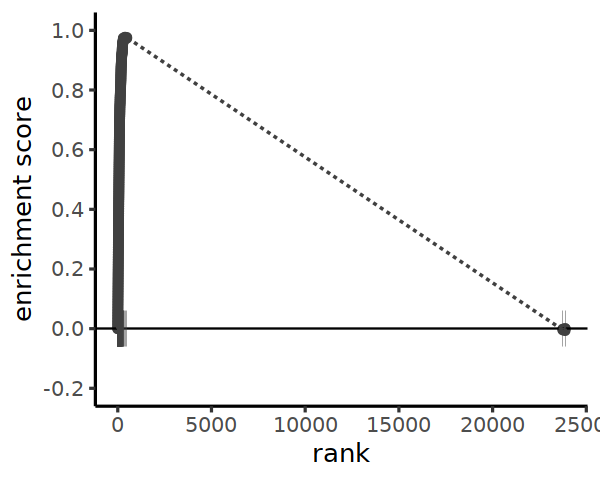

In [34]:
options(repr.plot.width=5, repr.plot.height=4)
plot_cpe_vs_neat1 = plotEnrichment(ambient_genes[["int_ambient"]], cpe_vs_neat1_rnk, ybreaks = seq(from = -0.2, to = 1, by = 0.2), ylims = c(-0.2,1), curvecol = "grey25")

options(repr.plot.width=5, repr.plot.height=4)
ggarrange(plot_cpe_vs_neat1, ncol = 1)
ggsave("Manuscript_Figures/SuppFig15_IntAmbient_Cpe_vs_Neat1_GSEA_Curves_Repo.pdf", width = 5, height = 4)

In [35]:
ftl1_vs_neat1_rnk = ftl1_vs_neat1$avg_log2FC
names(ftl1_vs_neat1_rnk) <- row.names(ftl1_vs_neat1)
corner(ftl1_vs_neat1_rnk)

fgseaRes_ftl1 <- fgsea(ambient_genes, ftl1_vs_neat1_rnk, minSize=0, maxSize= 300, nperm=1000)
fgseaRes_ftl1

Rb1cc1 4732440D04Rik         Cspp1          Rpl7         Pkhd1 
   -1.0516806    -0.8778779    -1.7448762     2.8800172    -1.3489910

Warning message in fgsea(ambient_genes, ftl1_vs_neat1_rnk, minSize = 0, maxSize = 300, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (1.59% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
11_VX5256_T,0.001937984,0.001937984,0.9561301,2.430852,0,200,"Ftl1 , Tpt1 , Fth1 , Rplp1 , Rps29 , Rpl39 , Rpl23 , Rps2 , Rpl32 , Tmsb10 , Rplp0 , Rpl38 , Atox1 , Cox8a , Cox6b1 , Nme2 , Cox4i1 , Rpl28 , Mif , Rpl41 , Gapdh , Cstb , Fau , Rps28 , Rpl26 , Txn1 , Rps26 , Cox5b , Atp5e , Rps10 , Rps16 , Rps23 , Rpl19 , Rps20 , Cox5a , Rps24 , Rps11 , Cox6c , Chchd2 , Rps19 , Cryab , Rpl37 , Cox6a1 , Rpl35a , Rps12 , Rpl37a , Rps14 , Rpsa , Rpl24 , Rps27a , Cox7a2 , Rps5 , Rpl13 , Lgals1 , Rps18 , Dbi , Rpl21 , Fxyd2 , Rps15a , Gpx4 , Rpl36 , Rps21 , Rps17 , Gpx1 , Rpl17 , Crip1 , Rpl34 , Atp5j2 , Rpl27a , Rps8 , Rpl18a , Rps3a1 , Rps3 , Rpl11 , Rpl30 , Rplp2 , Cox7c , Gsta2 , Rps7 , Rpl13a , Rpl27 , Rps4x , Rps15 , Rps25 , Rpl22 , Ppia , Atp5h , Rpl15 , S100a6 , Rpl12 , Uqcrh , Gng5 , Rpl18 , Rpl23a , Cyba , B2m , Gpx3 , Rpl7 , Rpl35 , Prdx1 , Atp5l , Rpl36a , Gstm1 , Eef1b2 , Rps13 , Rpl8 , Cst3 , Lgals3 , Rps6 , Rpl5 , Rps9 , Rpl14 , Rpl29 , Rps27 , Eef1a1 , Hint1 , Rpl3 , Actb , Rpl9 , Rpl7a , Tmsb4x , Esd , Myl6 , Rpl10 , mt-Co1 , Mt1 , Rack1 , Atpif1 , Gm42418 , Ptgds , Sh3bgrl3, Naca , Itm2b , Serf2 , Ptma , Ctsl , Lamp1 , Tmem176a, Tmem176b, Cd74 , Rpl31 , mt-Atp6 , Cd63 , Rpl6 , Cpe , Rpl36al , mt-Nd4 , H2afz , Selenop , Spp1 , S100a10 , mt-Co2 , Atp6v0c , Calm1 , Apoe , Npm1 , mt-Co3 , Hsp90ab1, Pfn1 , Ctsd , Ctsz , Ubb , mt-Nd2 , mt-Cytb , Eif1 , Ctsb , Rpl10a , mt-Nd1 , Oaz1 , H3f3a , H2-Ab1 , H2-D1 , Hspa8 , Actg1 , Ly6e , H2-K1"
3_BB453_T,0.001937984,0.001937984,0.9358779,2.379363,0,200,"Ftl1 , Tpt1 , Fth1 , Rplp1 , Rps29 , Rpl39 , Rpl23 , Rps2 , Rpl32 , Tmsb10 , Rplp0 , Rpl38 , Atox1 , Cox8a , Cox6b1 , Nme2 , Cox4i1 , Rpl28 , Spink1 , Mif , Rpl41 , Gapdh , Cstb , Fau , Rps28 , Rpl26 , Txn1 , Rps26 , Cox5b , Atp5e , Rps10 , Rps16 , Rps23 , Rpl19 , Rps20 , Cox5a , Rps24 , Rps11 , Cox6c , Chchd2 , Rps19 , Uqcr11 , Cryab , Rpl37 , Cox6a1 , Rpl35a , Rps12 , Rpl37a , Rps14 , Chchd10 , Rpsa , Rpl24 , Rps27a , Cox7a2 , Rps5 , Cox7b , Prdx5 , Rpl13 , Lgals1 , Rps18 , Dbi , Uqcr10 , Rpl21 , Fxyd2 , Rps15a , Gpx4 , Rpl36 , Uqcrq , Rps21 , Rps17 , Gpx1 , Rpl17 , Crip1 , Ndufa4 , Rpl34 , Atp5j2 , Rpl27a , Rps8 , Rpl18a , Rps3a1 , Rps3 , Rpl11 , Rpl30 , Rplp2 , Cox7c , Gsta2 , Rps7 , Rps27l , Rpl13a , Rpl27 , Rps4x , Rps15 , Rps25 , Ppia , Rpl15 , S100a6 , Rpl12 , Gng5 , Rpl18 , Cyba , B2m , Gpx3 , Ndufb9 , Rpl7 , Ndufb8 , Prdx1 , Atp5l , Gstm1 , Elob , Rps13 , Rpl8 , Cst3 , Fam162a , Lgals3 , Rpl5 , Rps9 , Ndufa13 , Rps27 , Eef1a1 , Hint1 , Rpl3 , Tspo , Actb , Rpl9 , Rpl7a , Bsg , Tmsb4x , Esd , Myl6 , Taldo1 , Aldoa , mt-Co1 , Mt1 , Atpif1 , Gm42418 , Ptgds , Itm2b , Serf2 , Apoc3 , Ptma , Ctsl , Lamp1 , Calr , Tmem176a, Tmem176b, Atp5b , Cd74 , Npc2 , mt-Atp6 , Cd63 , Rpl6 , Cpe , Ldha , mt-Nd4 , Selenop , Spp1 , Mgst1 , mt-Co2 , Atp6v0c , Apoe , Gc , mt-Co3 , Bst2 , Creg1 , Hsp90ab1, Ctsd , Ctsz , Ubb , mt-Nd2 , mt-Cytb , Ctsb , Rpl10a , mt-Nd1 , Lgmn , Tpi1 , H2-D1 , Hspb1 , Cd81 , Hspa8 , Actg1 , H2-K1"
6_BB452_KL_T,0.001937984,0.001937984,0.9631025,2.448578,0,200,"Ftl1 , Tpt1 , Fth1 , Rplp1 , Rps29 , Rpl39 , Rpl23 , Rps2 , Rpl32 , Tmsb10 , Rplp0 , Rpl38 , Atox1 , Cox8a , Cox6b1 , Nme2 , Cox4i1 , Rpl28 , Spink1 , Mif , Rpl41 , Gapdh , Cstb , Fau , Rps28 , Rpl26 , Txn1 , Rps26 , Cox5b , Atp5e , Rps10 , Rps16 , Rps23 , Rpl19 , Rps20 , Cox5a , Rps24 , Rps11 , Cox6c , Chchd2 , Rps19 , Uqcr11 , Cryab , Rpl37 , Cox6a1 , Rpl35a , Rps12 , Rpl37a , Rps14 , Chchd10 , Rpsa , Rpl24 , Rps27a , Cox7a2 , Rps5 , Cox7b , Prdx5 , Rpl13 , Lgals1 , Rps18 , Dbi , Atp5md , Uqcr10 , Rpl21 , Fxyd2 , Rps15a , Gpx4 , Rpl36 , Uqcrq , Rps21 , Rps17 , Gpx1 , Rpl17 , Atp5mpl , Crip1 , Ndufa4 , Rpl34 , Atp5j2 , Rpl27a , Rps8 , Rpl18a , Rps3a1 , Rps3 , Uqcrb , Rpl11 , Rpl30 , Rplp2 , Cox7c , Atp5g1 , Gsta2 , Rps7 , Rps27l , Rpl13a , Rpl27 , Rps4x , Rps15 , Rps25 , Rpl22 , Ppia , Atp5h , Rpl15 , S100a6 , Ndufb1-ps, Rpl12 , Uqcrh , Atp5k , Atp5j , Gng5 ,

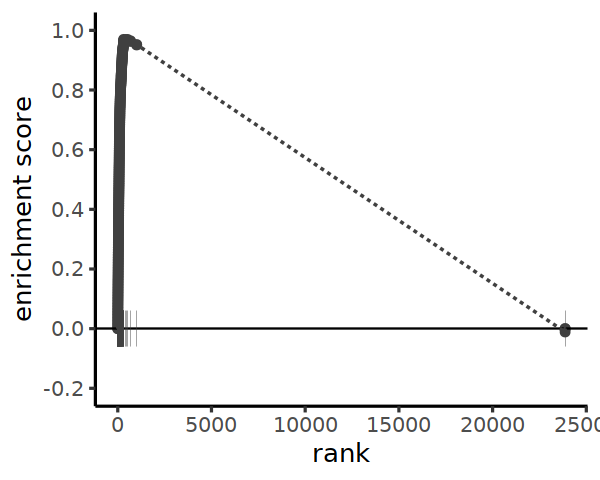

In [36]:
options(repr.plot.width=5, repr.plot.height=4)
plot_ftl1_vs_neat1 = plotEnrichment(ambient_genes[["int_ambient"]], ftl1_vs_neat1_rnk, ybreaks = seq(from = -0.2, to = 1, by = 0.2), ylims = c(-0.2,1), curvecol = "grey25")

options(repr.plot.width=5, repr.plot.height=4)
ggarrange(plot_ftl1_vs_neat1, ncol = 1)
ggsave("Manuscript_Figures/SuppFig15_IntAmbient_Ftl1_vs_Neat1_GSEA_Curves_Repo.pdf", width = 5, height = 4)

In [37]:
Idents(seur_ni_t_tum) = "Tumor_Cluster"

### Run Tum_Ftl1 vs Tum_Cpe comparison

In [39]:
ftl1_vs_cpe = FindMarkers(seur_ni_t_tum, `ident.1` = "Tumor_Ftl1",`ident.2` = "Tumor_Cpe",test.use = "LR",latent.vars = "Sex",min.diff.pct = 0, min.pct = 0,logfc.threshold = 0)
saveRDS(ftl1_vs_cpe, file = "Manuscript_Objects/Tumor_ftl1_vs_Tumor_cpe_DE_LR_Sex_Repo.RDS")

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [40]:
subset(ftl1_vs_cpe, avg_log2FC >0.5 & p_val_adj < 0.001)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AY036118,4.393308e-226,1.5957471,0.846,0.814,1.048726e-221
Ftl1,4.101839e-220,1.5786600,0.988,0.997,9.791500e-216
Gm42418,3.330954e-179,1.2659363,0.993,0.997,7.951321e-175
Fth1,3.966263e-167,1.1040425,0.990,0.996,9.467867e-163
Hbb-bs,1.829233e-83,2.1292161,0.176,0.057,4.366563e-79
Spink1,2.872686e-63,0.9005189,0.746,0.828,6.857388e-59
Rps2,7.177022e-52,0.8836358,0.925,0.970,1.713227e-47
Gstm1,1.989752e-44,0.7773930,0.879,0.941,4.749737e-40
Rplp1,5.449391e-43,0.8674319,0.895,0.951,1.300824e-38


In [41]:
ftl1_vs_cpe = readRDS(file = "Manuscript_Objects/Tumor_ftl1_vs_Tumor_cpe_DE_LR_Sex_Repo.RDS")

In [42]:
ftl1_vs_cpe_rnk = ftl1_vs_cpe$avg_log2FC
names(ftl1_vs_cpe_rnk) <- row.names(ftl1_vs_cpe)
corner(ftl1_vs_cpe_rnk)

fgseaRes_ftl1 <- fgsea(ambient_genes, ftl1_vs_cpe_rnk, minSize=0, maxSize= 300, nperm=1000)
fgseaRes_ftl1

Prrc2c       Pax8     Prrc2b      Rbm39     Zmynd8 
-0.7105631 -0.7612910 -0.5580443 -0.7480889 -0.6469697

Warning message in fgsea(ambient_genes, ftl1_vs_cpe_rnk, minSize = 0, maxSize = 300, :
"You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call."
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
"There are ties in the preranked stats (2.28% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results."


pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
11_VX5256_T,0.04000000,0.0480,0.8522903,2.493524,0,200,"Hbb-bs , AY036118, Ftl1 , Hba-a1 , Hba-a2 , Gm42418 , Fth1 , Rps26 , Cox6a1 , Cox5b , Rps2 , Rplp1 , Tpt1 , Gstm1 , Cox7c , Rplp0 , Rpl12 , Cox4i1 , Cox6b1 , Rps12 , Lgals1 , Rps19 , Atp5l , Rpl13a , Txn1 , Atp5h , Rpsa , Atp5e , Cox6c , Atpif1 , Cryab , Rpl41 , Hbb-bt , Mif , Rpl28 , Gpx4 , Rpl35 , Rpl39 , Rpl26 , Rpl21 , Gpx1 , Atp5j2 , Nme2 , Npm1 , Cox8a , Wfdc17 , Rpl32 , Fxyd2 , Gsta2 , Rps24 , Eef1b2 , Atox1 , Rps18 , Rps29 , Rps17 , Rps25 , Rps15 , Rpl13 , Cox5a , Rpl37a , Rpl22 , Rpl38 , Rps10 , Rps14 , Rpl5 , Rpl36 , Rps5 , Rps23 , Cox7a2 , H2afz , Rps6 , Rpl18a , Rps11 , Fau , Rps20 , Rpl24 , Rpl17 , Rpl36a , Rpl27 , Rpl11 , Serf2 , Ptma , Rpl29 , Rpl10a , Ppia , Rpl37 , Uqcrh , Rpl19 , Cyba , Rpl14 , Rplp2 , Rpl7a , Rpl23a , Prdx1 , Rps13 , Rpl23 , Cstb , Rps8 , Rps9 , Rps7 , Rpl31 , Rps27a , Esd , Rpl27a , Rps28 , Rpl34 , Myl6 , Rpl35a , Rps21 , Rps3 , Rps3a1 , Crip1 , Rpl15 , Rpl10 , Rps16 , Gapdh , Rps4x , Rpl8 , Cd63 , Tmsb10 , Rpl9 , Rpl7 , Rpl6 , Rps15a , Rpl36al , Apoe , Chchd2 , Rack1 , Ctsz , Rpl18 , Rps27 , Hint1 , Oaz1 , mt-Co1 , Rpl30 , C1qa , Lyz2 , Tyrobp , C1qb , Rpl3 , Naca , Dbi , B2m , Tmem176a, Fcer1g , Ctss , Lgals3 , Gng5 , S100a10 , C1qc , Hsp90ab1, mt-Atp6 , Ubb"
3_BB453_T,0.04000000,0.0480,0.7769662,2.273150,0,200,"AY036118, Ftl1 , Gm42418 , Apoc3 , Fth1 , Rps26 , Cox6a1 , Calr , Spink1 , Cox5b , Rps2 , Rplp1 , Prdx5 , Chchd10 , Cox7b , Tpt1 , Gstm1 , Cox7c , Rplp0 , Rpl12 , Cox4i1 , Cox6b1 , Rps12 , Uqcr10 , Lgals1 , Rps19 , Atp5l , Rpl13a , Txn1 , Rpsa , Atp5e , Cox6c , Atpif1 , Cryab , Rpl41 , Mif , Rpl28 , Gpx4 , Uqcr11 , Rpl39 , Rpl26 , Rpl21 , Gpx1 , Uqcrq , Atp5j2 , Nme2 , Cox8a , Rpl32 , Fxyd2 , Gsta2 , Rps24 , Atox1 , Rps18 , Ndufb8 , Rps29 , Rps17 , Rps25 , Rps15 , Rpl13 , Cox5a , Ndufa13 , Rpl37a , Rpl38 , Rps10 , Rps14 , Rpl5 , Rpl36 , Rps5 , Rps23 , Cox7a2 , Rpl18a , Rps11 , Fau , Rps20 , Rpl24 , Rpl17 , Rpl27 , Rpl11 , Serf2 , Ptma , Rpl10a , Ppia , Rpl37 , Rpl19 , Cyba , Rplp2 , Ndufa4 , Rpl7a , Prdx1 , Rps13 , Rpl23 , Elob , Cstb , Rps8 , Rps9 , Rps7 , Atp5b , Rps27a , Esd , Rpl27a , Rps28 , Rpl34 , Ndufb9 , Myl6 , Rpl35a , Rps21 , Rps27l , Rps3 , Rps3a1 , Crip1 , Rpl15 , Taldo1 , Mgst1 , Rps16 , Gapdh , Bst2 , Fam162a , Rps4x , Npc2 , Rpl8 , Cd63 , Tmsb10 , Rpl9 , Rpl7 , Rpl6 , Rps15a , Apoe , Chchd2 , Ctsz , Rpl18 , Rps27 , Hint1 , mt-Co1 , Rpl30 , Ugp2 , C1qa , Lyz2"
6_BB452_KL_T,0.04000000,0.0480,0.8713682,2.549339,0,200,"Hbb-bs , AY036118 , Ftl1 , Hba-a1 , Hba-a2 , Gm42418 , Fth1 , Rps26 , Cox6a1 , Spink1 , Cox5b , Rps2 , Rplp1 , Prdx5 , Atp5md , Chchd10 , Cox7b , Atp5mpl , Tpt1 , Gstm1 , Cox7c , Rplp0 , Rpl12 , Cox4i1 , Uqcrb , Cox6b1 , Rps12 , Uqcr10 , Lgals1 , Rps19 , Atp5l , Rpl13a , Atp5k , Txn1 , Atp5h , Rida , Rpsa , Atp5e , Cox6c , Atpif1 , Cryab , Rpl41 , Ndufb1-ps, Mif , Rpl28 , Gpx4 , Uqcr11 , Rpl39 , Rpl26 , Rpl21 , Gpx1 , Uqcrq , Atp5j2 , Nme2 , Cox8a , Wfdc17 , Rpl32 , Fxyd2 , Gsta2 , Atp5g1 , Rps24 , Atox1 , Rps18 , Ndufb8 , Rps29 , Rps17 , Rps25 , Rps15 , Rpl13 , Cox5a , Ndufa13 , Rpl37a , Rpl22 , Rpl38 , Rps10 , Rps14 , Rpl36 , Rps5 , Rps23 , Cox7a2 , Rpl18a , Rps11 , Fau , Rps20 , Rpl24 , Rpl17 , Rpl27 , Rpl11 , Serf2 , Ptma , Rpl10a , Atp5j , Aldob , Ppia , Rpl37 , Uqcrh , Rpl19 , Cyba , Akr1a1 , Rplp2 , Ndufa4 , Prdx1 , Rps13 , Rpl23 , Cstb , Rps8 , Rps9 , Rps7 , Rps27a , Esd , Rpl27a , Rps28 , Rpl34 , Ndufb9 , Myl6 , Rpl35a , Rps21 , Rps27l , Rps3 , Rps3a1 , Crip1 , Rpl15 , Taldo1 , Rpl10 , Rps16 , Gapdh , Rps4x , Rpl8 , Cd63 , Tmsb10 , Rpl9 , Rpl7 , Rpl6 , Rps15a , Apoe , Chchd2 , Chpt1 , Ctsz , Rpl18 , Rps27 , Hint1 , mt-Co1 , Rpl30 , Ugp2 , C1qa , Lyz2 , S100a11 , C1qb , Rpl3 , Dbi , Creg1 , B2m , Tmem176a , Ctss , Lgals3 , Gng5 , S100a10 , Hsp90ab1 , mt-Atp6 , Ubb , Lgmn"
9_VX516_T,0.04000000,0.0480,0.7538433,2.205500,0,200,"AY036118, Ftl1 , Gm42418 , Fth1 , Rps26 , Cox6a1 , Calr , Cox5b ,

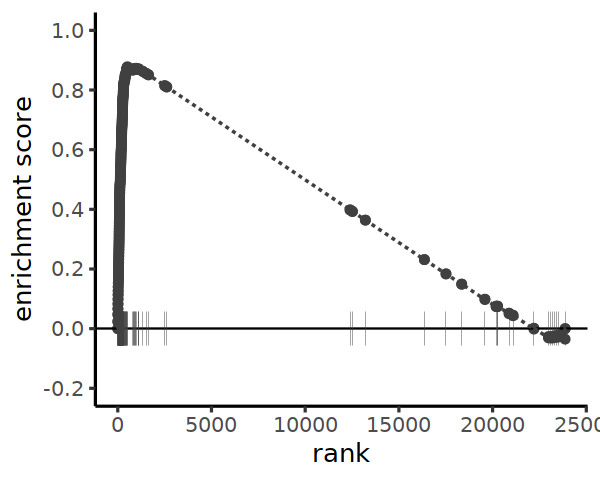

In [43]:
options(repr.plot.width=5, repr.plot.height=4)
plot_ftl1_vs_cpe = plotEnrichment(ambient_genes[["int_ambient"]], ftl1_vs_cpe_rnk, ybreaks = seq(from = -0.2, to = 1, by = 0.2), ylims = c(-0.2,1), curvecol = "grey25")

options(repr.plot.width=5, repr.plot.height=4)
ggarrange(plot_ftl1_vs_cpe, ncol = 1)
ggsave("Manuscript_Figures/SuppFig15_IntAmbient_Ftl1_vs_Cpe_GSEA_Curves_Repo.pdf", width = 5, height = 4)